# Facebook Prophet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [60]:
import warnings
warnings.simplefilter("ignore")

In [33]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.model_selection import ParameterGrid

In [68]:
# load the data
# YYYY-MM-DD
df = pd.read_csv('../../_data/nyc_data.csv')
df.head()

,Date,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
0,1/1/2015,720.000885,0,0,0,3.68,41.305
1,1/2/2015,581.276773,0,0,0,4.73,131.574
2,1/3/2015,754.117039,0,0,0,7.23,162.700
3,1/4/2015,622.252774,0,0,0,10.96,160.281
4,1/5/2015,785.373319,0,0,0,6.92,51.077


In [48]:
# Rename variable
df = df.rename(columns={'Demand': 'y',
                        'Date': 'ds'})
df.head()

,ds,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
0,1/1/2015,720.000885,0,0,0,3.68,41.305
1,1/2/2015,581.276773,0,0,0,4.73,131.574
2,1/3/2015,754.117039,0,0,0,7.23,162.700
3,1/4/2015,622.252774,0,0,0,10.96,160.281
4,1/5/2015,785.373319,0,0,0,6.92,51.077


In [49]:
# Data variable
df.ds = pd.to_datetime(df.ds,
                       format="%m/%d/%Y")
df.ds

0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
          ...    
2249   2021-01-27
2250   2021-01-28
2251   2021-01-29
2252   2021-01-30
2253   2021-01-31
Name: ds, Length: 2254, dtype: datetime64[ns]

## Holidays

In [50]:
# Easter
dates = pd.to_datetime(df[df.Easter == 1].ds)
easter = pd.DataFrame({'holiday': 'easter',
                       'ds': dates,
                       'lower_window': -5,
                       'upper_window': 2})
easter

,holiday,ds,lower_window,upper_window
94,easter,2015-04-05,-5,2
451,easter,2016-03-27,-5,2
836,easter,2017-04-16,-5,2
1186,easter,2018-04-01,-5,2
1571,easter,2019-04-21,-5,2
1928,easter,2020-04-12,-5,2


In [51]:
# Thanksgiving
dates = pd.to_datetime(df[df.Thanksgiving == 1].ds)
thanksgiving = pd.DataFrame({'holiday': 'thanksgiving',
                             'ds': dates,
                             'lower_window': -3,
                             'upper_window': 6})
thanksgiving

,holiday,ds,lower_window,upper_window
329,thanksgiving,2015-11-26,-3,6
693,thanksgiving,2016-11-24,-3,6
1057,thanksgiving,2017-11-23,-3,6
1421,thanksgiving,2018-11-22,-3,6
1792,thanksgiving,2019-11-28,-3,6
2156,thanksgiving,2020-11-26,-3,6


In [52]:
# Combining events
holidays = pd.concat([easter, thanksgiving])
holidays

,holiday,ds,lower_window,upper_window
94,easter,2015-04-05,-5,2
451,easter,2016-03-27,-5,2
836,easter,2017-04-16,-5,2
1186,easter,2018-04-01,-5,2
1571,easter,2019-04-21,-5,2
1928,easter,2020-04-12,-5,2
329,thanksgiving,2015-11-26,-3,6
693,thanksgiving,2016-11-24,-3,6
1057,thanksgiving,2017-11-23,-3,6
1421,thanksgiving,2018-11-22,-3,6


In [53]:
# removing the holiday columns
df = df.drop(columns=["Easter", "Thanksgiving"])
df.head()

,ds,y,Christmas,Temperature,Marketing
0,2015-01-01,720.000885,0,3.68,41.305
1,2015-01-02,581.276773,0,4.73,131.574
2,2015-01-03,754.117039,0,7.23,162.700
3,2015-01-04,622.252774,0,10.96,160.281
4,2015-01-05,785.373319,0,6.92,51.077


## Facebook Prophet model

In [67]:
# FB model
fb_model = Prophet(holidays=holidays,
                   seasonality_mode='multiplicative',
                   seasonality_prior_scale=10,
                   holidays_prior_scale=10,
                   changepoint_prior_scale=0.05)
fb_model.add_regressor('Christmas')
fb_model.add_regressor('Temperature')
fb_model.add_regressor('Marketing')
fb_model.fit(df)

14:53:11 - cmdstanpy - INFO - Chain [1] start processing
14:53:11 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
# Check how many observations
df.shape[0] - 180

2012

In [17]:
# Cross-validation
df_cv = cross_validation(model=fb_model,
                         horizon='31 days',
                         period='16 days',
                         initial='2012 days',
                         parallel='processes')
df_cv.head()

13:44:38 - cmdstanpy - INFO - Chain [1] start processing
13:44:38 - cmdstanpy - INFO - Chain [1] start processing
13:44:38 - cmdstanpy - INFO - Chain [1] start processing
13:44:38 - cmdstanpy - INFO - Chain [1] start processing
13:44:38 - cmdstanpy - INFO - Chain [1] start processing
13:44:38 - cmdstanpy - INFO - Chain [1] start processing
13:44:38 - cmdstanpy - INFO - Chain [1] start processing
13:44:38 - cmdstanpy - INFO - Chain [1] start processing
13:44:38 - cmdstanpy - INFO - Chain [1] start processing
13:44:38 - cmdstanpy - INFO - Chain [1] start processing
13:44:43 - cmdstanpy - INFO - Chain [1] done processing
13:44:44 - cmdstanpy - INFO - Chain [1] done processing
13:44:45 - cmdstanpy - INFO - Chain [1] done processing
13:44:45 - cmdstanpy - INFO - Chain [1] done processing
13:44:45 - cmdstanpy - INFO - Chain [1] done processing
13:44:46 - cmdstanpy - INFO - Chain [1] done processing
13:44:46 - cmdstanpy - INFO - Chain [1] done processing
13:44:46 - cmdstanpy - INFO - Chain [1

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-07-10,607.367413,542.008931,677.023664,571.069531,2020-07-09
1,2020-07-11,722.175178,658.333438,785.303614,677.106981,2020-07-09
2,2020-07-12,637.038170,571.261535,705.125307,619.572774,2020-07-09
3,2020-07-13,769.300007,699.933124,837.485586,808.932621,2020-07-09
4,2020-07-14,636.676862,571.117341,703.601256,661.791644,2020-07-09


In [21]:
# Performance
performance_metrics(df_cv).head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,2828.051674,53.179429,43.364264,0.058925,0.060902,0.060042,0.800000
1,5 days,2814.628898,53.053076,44.401202,0.062050,0.064086,0.062879,0.767742
2,6 days,3519.971111,59.329344,50.463632,0.069747,0.064086,0.071202,0.703226
3,7 days,2800.210189,52.917012,42.919490,0.060501,0.058957,0.061577,0.735484
4,8 days,2756.975543,52.506909,40.490978,0.055964,0.056503,0.057483,0.764516


In [30]:
# RMSE and MAPE
print(f"RMSE: {round(performance_metrics(df_cv)['rmse'].mean(), 1)}%")
print(f"MAPE: {100 * round(performance_metrics(df_cv)['mape'].mean(), 3):.2f}%")

RMSE: 53.8%
MAPE: 5.80%


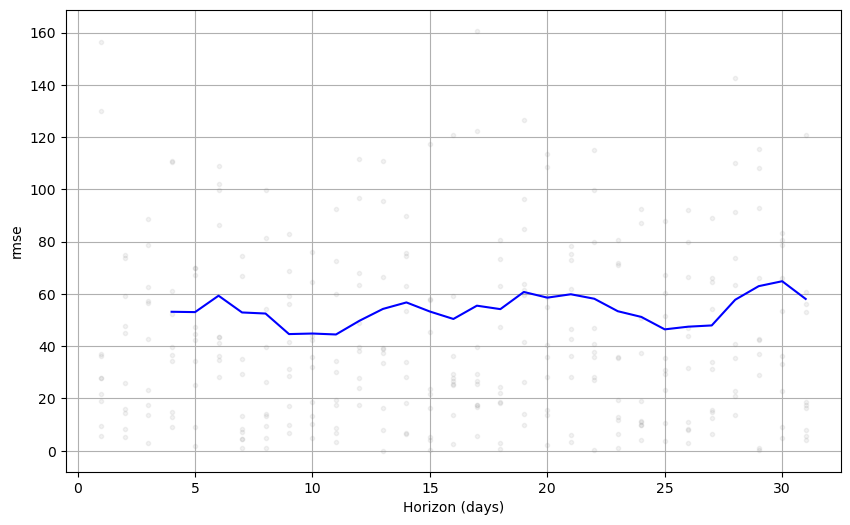

In [32]:
# plotting
plot_cross_validation_metric(df_cv, metric='rmse');

## Parameter Tuning

In [35]:
# Parameter Grid
param_grid = {'seasonality_mode': ["additive", "multiplicative"],
              'seasonality_prior_scale': [1, 5, 10, 20],
              'holidays_prior_scale': [5, 10, 20, 25],
              'changepoint_prior_scale': [0.005, 0.01, 0.05, 0.1]}

grid = ParameterGrid(param_grid=param_grid)
list(grid), len(list(grid))

([{'changepoint_prior_scale': 0.005,
   'holidays_prior_scale': 5,
   'seasonality_mode': 'additive',
   'seasonality_prior_scale': 1},
  {'changepoint_prior_scale': 0.005,
   'holidays_prior_scale': 5,
   'seasonality_mode': 'additive',
   'seasonality_prior_scale': 5},
  {'changepoint_prior_scale': 0.005,
   'holidays_prior_scale': 5,
   'seasonality_mode': 'additive',
   'seasonality_prior_scale': 10},
  {'changepoint_prior_scale': 0.005,
   'holidays_prior_scale': 5,
   'seasonality_mode': 'additive',
   'seasonality_prior_scale': 20},
  {'changepoint_prior_scale': 0.005,
   'holidays_prior_scale': 5,
   'seasonality_mode': 'multiplicative',
   'seasonality_prior_scale': 1},
  {'changepoint_prior_scale': 0.005,
   'holidays_prior_scale': 5,
   'seasonality_mode': 'multiplicative',
   'seasonality_prior_scale': 5},
  {'changepoint_prior_scale': 0.005,
   'holidays_prior_scale': 5,
   'seasonality_mode': 'multiplicative',
   'seasonality_prior_scale': 10},
  {'changepoint_prior_scale

In [37]:
# Store the results
rmse = []

# Loop
i = 1
for params in grid:
    print(f"INFO: {i} / {len(list(grid))}")

    # model
    fb_model = Prophet(holidays=holidays,
                   seasonality_mode=params['seasonality_mode'],
                   seasonality_prior_scale=params['seasonality_prior_scale'],
                   holidays_prior_scale=params['holidays_prior_scale'],
                   changepoint_prior_scale=params['changepoint_prior_scale'])
    fb_model.add_regressor('Christmas')
    fb_model.add_regressor('Temperature')
    fb_model.add_regressor('Marketing')
    fb_model.fit(df)

    # cv
    df_cv = cross_validation(fb_model,
                             horizon = '31 days',
                             period = '16 days',
                             initial = '2012 days',
                             parallel = 'processes')

    # Measure the error and store the result
    error = performance_metrics(df_cv)["rmse"].mean()
    rmse.append(error)

    i += 1

INFO: 1 / 128


14:22:15 - cmdstanpy - INFO - Chain [1] start processing
14:22:15 - cmdstanpy - INFO - Chain [1] done processing
14:22:16 - cmdstanpy - INFO - Chain [1] start processing
14:22:16 - cmdstanpy - INFO - Chain [1] start processing
14:22:16 - cmdstanpy - INFO - Chain [1] start processing
14:22:16 - cmdstanpy - INFO - Chain [1] start processing
14:22:16 - cmdstanpy - INFO - Chain [1] start processing
14:22:16 - cmdstanpy - INFO - Chain [1] start processing
14:22:16 - cmdstanpy - INFO - Chain [1] start processing
14:22:16 - cmdstanpy - INFO - Chain [1] start processing
14:22:16 - cmdstanpy - INFO - Chain [1] start processing
14:22:16 - cmdstanpy - INFO - Chain [1] start processing
14:22:19 - cmdstanpy - INFO - Chain [1] done processing
14:22:19 - cmdstanpy - INFO - Chain [1] done processing
14:22:19 - cmdstanpy - INFO - Chain [1] done processing
14:22:19 - cmdstanpy - INFO - Chain [1] done processing
14:22:19 - cmdstanpy - INFO - Chain [1] done processing
14:22:19 - cmdstanpy - INFO - Chain [

INFO: 2 / 128


14:22:20 - cmdstanpy - INFO - Chain [1] done processing
14:22:21 - cmdstanpy - INFO - Chain [1] start processing
14:22:21 - cmdstanpy - INFO - Chain [1] start processing
14:22:21 - cmdstanpy - INFO - Chain [1] start processing
14:22:21 - cmdstanpy - INFO - Chain [1] start processing
14:22:21 - cmdstanpy - INFO - Chain [1] start processing
14:22:21 - cmdstanpy - INFO - Chain [1] start processing
14:22:21 - cmdstanpy - INFO - Chain [1] start processing
14:22:21 - cmdstanpy - INFO - Chain [1] start processing
14:22:21 - cmdstanpy - INFO - Chain [1] start processing
14:22:21 - cmdstanpy - INFO - Chain [1] start processing
14:22:23 - cmdstanpy - INFO - Chain [1] done processing
14:22:23 - cmdstanpy - INFO - Chain [1] done processing
14:22:23 - cmdstanpy - INFO - Chain [1] done processing
14:22:23 - cmdstanpy - INFO - Chain [1] done processing
14:22:23 - cmdstanpy - INFO - Chain [1] done processing
14:22:24 - cmdstanpy - INFO - Chain [1] done processing
14:22:24 - cmdstanpy - INFO - Chain [1

INFO: 3 / 128


14:22:25 - cmdstanpy - INFO - Chain [1] done processing
14:22:25 - cmdstanpy - INFO - Chain [1] start processing
14:22:25 - cmdstanpy - INFO - Chain [1] start processing
14:22:25 - cmdstanpy - INFO - Chain [1] start processing
14:22:25 - cmdstanpy - INFO - Chain [1] start processing
14:22:25 - cmdstanpy - INFO - Chain [1] start processing
14:22:25 - cmdstanpy - INFO - Chain [1] start processing
14:22:25 - cmdstanpy - INFO - Chain [1] start processing
14:22:25 - cmdstanpy - INFO - Chain [1] start processing
14:22:25 - cmdstanpy - INFO - Chain [1] start processing
14:22:25 - cmdstanpy - INFO - Chain [1] start processing
14:22:26 - cmdstanpy - INFO - Chain [1] done processing
14:22:27 - cmdstanpy - INFO - Chain [1] done processing
14:22:27 - cmdstanpy - INFO - Chain [1] done processing
14:22:27 - cmdstanpy - INFO - Chain [1] done processing
14:22:28 - cmdstanpy - INFO - Chain [1] done processing
14:22:28 - cmdstanpy - INFO - Chain [1] done processing
14:22:28 - cmdstanpy - INFO - Chain [1

INFO: 4 / 128


14:22:29 - cmdstanpy - INFO - Chain [1] done processing
14:22:30 - cmdstanpy - INFO - Chain [1] start processing
14:22:30 - cmdstanpy - INFO - Chain [1] start processing
14:22:30 - cmdstanpy - INFO - Chain [1] start processing
14:22:30 - cmdstanpy - INFO - Chain [1] start processing
14:22:30 - cmdstanpy - INFO - Chain [1] start processing
14:22:30 - cmdstanpy - INFO - Chain [1] start processing
14:22:30 - cmdstanpy - INFO - Chain [1] start processing
14:22:30 - cmdstanpy - INFO - Chain [1] start processing
14:22:30 - cmdstanpy - INFO - Chain [1] start processing
14:22:30 - cmdstanpy - INFO - Chain [1] start processing
14:22:32 - cmdstanpy - INFO - Chain [1] done processing
14:22:32 - cmdstanpy - INFO - Chain [1] done processing
14:22:32 - cmdstanpy - INFO - Chain [1] done processing
14:22:32 - cmdstanpy - INFO - Chain [1] done processing
14:22:33 - cmdstanpy - INFO - Chain [1] done processing
14:22:33 - cmdstanpy - INFO - Chain [1] done processing
14:22:33 - cmdstanpy - INFO - Chain [1

INFO: 5 / 128


14:22:34 - cmdstanpy - INFO - Chain [1] done processing
14:22:34 - cmdstanpy - INFO - Chain [1] start processing
14:22:34 - cmdstanpy - INFO - Chain [1] start processing
14:22:34 - cmdstanpy - INFO - Chain [1] start processing
14:22:34 - cmdstanpy - INFO - Chain [1] start processing
14:22:34 - cmdstanpy - INFO - Chain [1] start processing
14:22:34 - cmdstanpy - INFO - Chain [1] start processing
14:22:34 - cmdstanpy - INFO - Chain [1] start processing
14:22:34 - cmdstanpy - INFO - Chain [1] start processing
14:22:34 - cmdstanpy - INFO - Chain [1] start processing
14:22:34 - cmdstanpy - INFO - Chain [1] start processing
14:22:36 - cmdstanpy - INFO - Chain [1] done processing
14:22:36 - cmdstanpy - INFO - Chain [1] done processing
14:22:37 - cmdstanpy - INFO - Chain [1] done processing
14:22:37 - cmdstanpy - INFO - Chain [1] done processing
14:22:37 - cmdstanpy - INFO - Chain [1] done processing
14:22:37 - cmdstanpy - INFO - Chain [1] done processing
14:22:37 - cmdstanpy - INFO - Chain [1

INFO: 6 / 128


14:22:38 - cmdstanpy - INFO - Chain [1] done processing
14:22:39 - cmdstanpy - INFO - Chain [1] start processing
14:22:39 - cmdstanpy - INFO - Chain [1] start processing
14:22:39 - cmdstanpy - INFO - Chain [1] start processing
14:22:39 - cmdstanpy - INFO - Chain [1] start processing
14:22:39 - cmdstanpy - INFO - Chain [1] start processing
14:22:39 - cmdstanpy - INFO - Chain [1] start processing
14:22:39 - cmdstanpy - INFO - Chain [1] start processing
14:22:39 - cmdstanpy - INFO - Chain [1] start processing
14:22:39 - cmdstanpy - INFO - Chain [1] start processing
14:22:39 - cmdstanpy - INFO - Chain [1] start processing
14:22:40 - cmdstanpy - INFO - Chain [1] done processing
14:22:41 - cmdstanpy - INFO - Chain [1] done processing
14:22:41 - cmdstanpy - INFO - Chain [1] done processing
14:22:41 - cmdstanpy - INFO - Chain [1] done processing
14:22:41 - cmdstanpy - INFO - Chain [1] done processing
14:22:42 - cmdstanpy - INFO - Chain [1] done processing
14:22:42 - cmdstanpy - INFO - Chain [1

INFO: 7 / 128


14:22:43 - cmdstanpy - INFO - Chain [1] done processing
14:22:43 - cmdstanpy - INFO - Chain [1] start processing
14:22:43 - cmdstanpy - INFO - Chain [1] start processing
14:22:43 - cmdstanpy - INFO - Chain [1] start processing
14:22:43 - cmdstanpy - INFO - Chain [1] start processing
14:22:43 - cmdstanpy - INFO - Chain [1] start processing
14:22:43 - cmdstanpy - INFO - Chain [1] start processing
14:22:43 - cmdstanpy - INFO - Chain [1] start processing
14:22:43 - cmdstanpy - INFO - Chain [1] start processing
14:22:43 - cmdstanpy - INFO - Chain [1] start processing
14:22:43 - cmdstanpy - INFO - Chain [1] start processing
14:22:44 - cmdstanpy - INFO - Chain [1] done processing
14:22:46 - cmdstanpy - INFO - Chain [1] done processing
14:22:46 - cmdstanpy - INFO - Chain [1] done processing
14:22:46 - cmdstanpy - INFO - Chain [1] done processing
14:22:46 - cmdstanpy - INFO - Chain [1] done processing
14:22:46 - cmdstanpy - INFO - Chain [1] done processing
14:22:46 - cmdstanpy - INFO - Chain [1

INFO: 8 / 128


14:22:47 - cmdstanpy - INFO - Chain [1] done processing
14:22:48 - cmdstanpy - INFO - Chain [1] start processing
14:22:48 - cmdstanpy - INFO - Chain [1] start processing
14:22:48 - cmdstanpy - INFO - Chain [1] start processing
14:22:48 - cmdstanpy - INFO - Chain [1] start processing
14:22:48 - cmdstanpy - INFO - Chain [1] start processing
14:22:48 - cmdstanpy - INFO - Chain [1] start processing
14:22:48 - cmdstanpy - INFO - Chain [1] start processing
14:22:48 - cmdstanpy - INFO - Chain [1] start processing
14:22:48 - cmdstanpy - INFO - Chain [1] start processing
14:22:48 - cmdstanpy - INFO - Chain [1] start processing
14:22:49 - cmdstanpy - INFO - Chain [1] done processing
14:22:50 - cmdstanpy - INFO - Chain [1] done processing
14:22:50 - cmdstanpy - INFO - Chain [1] done processing
14:22:50 - cmdstanpy - INFO - Chain [1] done processing
14:22:50 - cmdstanpy - INFO - Chain [1] done processing
14:22:51 - cmdstanpy - INFO - Chain [1] done processing
14:22:51 - cmdstanpy - INFO - Chain [1

INFO: 9 / 128


14:22:51 - cmdstanpy - INFO - Chain [1] done processing
14:22:52 - cmdstanpy - INFO - Chain [1] start processing
14:22:52 - cmdstanpy - INFO - Chain [1] start processing
14:22:52 - cmdstanpy - INFO - Chain [1] start processing
14:22:52 - cmdstanpy - INFO - Chain [1] start processing
14:22:52 - cmdstanpy - INFO - Chain [1] start processing
14:22:52 - cmdstanpy - INFO - Chain [1] start processing
14:22:52 - cmdstanpy - INFO - Chain [1] start processing
14:22:52 - cmdstanpy - INFO - Chain [1] start processing
14:22:52 - cmdstanpy - INFO - Chain [1] start processing
14:22:52 - cmdstanpy - INFO - Chain [1] start processing
14:22:54 - cmdstanpy - INFO - Chain [1] done processing
14:22:54 - cmdstanpy - INFO - Chain [1] done processing
14:22:54 - cmdstanpy - INFO - Chain [1] done processing
14:22:54 - cmdstanpy - INFO - Chain [1] done processing
14:22:55 - cmdstanpy - INFO - Chain [1] done processing
14:22:55 - cmdstanpy - INFO - Chain [1] done processing
14:22:56 - cmdstanpy - INFO - Chain [1

INFO: 10 / 128


14:22:57 - cmdstanpy - INFO - Chain [1] done processing
14:22:57 - cmdstanpy - INFO - Chain [1] start processing
14:22:57 - cmdstanpy - INFO - Chain [1] start processing
14:22:57 - cmdstanpy - INFO - Chain [1] start processing
14:22:57 - cmdstanpy - INFO - Chain [1] start processing
14:22:57 - cmdstanpy - INFO - Chain [1] start processing
14:22:57 - cmdstanpy - INFO - Chain [1] start processing
14:22:57 - cmdstanpy - INFO - Chain [1] start processing
14:22:57 - cmdstanpy - INFO - Chain [1] start processing
14:22:57 - cmdstanpy - INFO - Chain [1] start processing
14:22:57 - cmdstanpy - INFO - Chain [1] start processing
14:22:58 - cmdstanpy - INFO - Chain [1] done processing
14:23:00 - cmdstanpy - INFO - Chain [1] done processing
14:23:00 - cmdstanpy - INFO - Chain [1] done processing
14:23:00 - cmdstanpy - INFO - Chain [1] done processing
14:23:01 - cmdstanpy - INFO - Chain [1] done processing
14:23:01 - cmdstanpy - INFO - Chain [1] done processing
14:23:01 - cmdstanpy - INFO - Chain [1

INFO: 11 / 128


14:23:02 - cmdstanpy - INFO - Chain [1] done processing
14:23:03 - cmdstanpy - INFO - Chain [1] start processing
14:23:03 - cmdstanpy - INFO - Chain [1] start processing
14:23:03 - cmdstanpy - INFO - Chain [1] start processing
14:23:03 - cmdstanpy - INFO - Chain [1] start processing
14:23:03 - cmdstanpy - INFO - Chain [1] start processing
14:23:03 - cmdstanpy - INFO - Chain [1] start processing
14:23:03 - cmdstanpy - INFO - Chain [1] start processing
14:23:03 - cmdstanpy - INFO - Chain [1] start processing
14:23:03 - cmdstanpy - INFO - Chain [1] start processing
14:23:03 - cmdstanpy - INFO - Chain [1] start processing
14:23:05 - cmdstanpy - INFO - Chain [1] done processing
14:23:06 - cmdstanpy - INFO - Chain [1] done processing
14:23:06 - cmdstanpy - INFO - Chain [1] done processing
14:23:06 - cmdstanpy - INFO - Chain [1] done processing
14:23:06 - cmdstanpy - INFO - Chain [1] done processing
14:23:07 - cmdstanpy - INFO - Chain [1] done processing
14:23:07 - cmdstanpy - INFO - Chain [1

INFO: 12 / 128


14:23:08 - cmdstanpy - INFO - Chain [1] done processing
14:23:08 - cmdstanpy - INFO - Chain [1] start processing
14:23:08 - cmdstanpy - INFO - Chain [1] start processing
14:23:08 - cmdstanpy - INFO - Chain [1] start processing
14:23:08 - cmdstanpy - INFO - Chain [1] start processing
14:23:08 - cmdstanpy - INFO - Chain [1] start processing
14:23:08 - cmdstanpy - INFO - Chain [1] start processing
14:23:08 - cmdstanpy - INFO - Chain [1] start processing
14:23:08 - cmdstanpy - INFO - Chain [1] start processing
14:23:08 - cmdstanpy - INFO - Chain [1] start processing
14:23:08 - cmdstanpy - INFO - Chain [1] start processing
14:23:11 - cmdstanpy - INFO - Chain [1] done processing
14:23:11 - cmdstanpy - INFO - Chain [1] done processing
14:23:11 - cmdstanpy - INFO - Chain [1] done processing
14:23:11 - cmdstanpy - INFO - Chain [1] done processing
14:23:12 - cmdstanpy - INFO - Chain [1] done processing
14:23:12 - cmdstanpy - INFO - Chain [1] done processing
14:23:12 - cmdstanpy - INFO - Chain [1

INFO: 13 / 128


14:23:13 - cmdstanpy - INFO - Chain [1] done processing
14:23:13 - cmdstanpy - INFO - Chain [1] start processing
14:23:13 - cmdstanpy - INFO - Chain [1] start processing
14:23:13 - cmdstanpy - INFO - Chain [1] start processing
14:23:13 - cmdstanpy - INFO - Chain [1] start processing
14:23:13 - cmdstanpy - INFO - Chain [1] start processing
14:23:13 - cmdstanpy - INFO - Chain [1] start processing
14:23:13 - cmdstanpy - INFO - Chain [1] start processing
14:23:13 - cmdstanpy - INFO - Chain [1] start processing
14:23:13 - cmdstanpy - INFO - Chain [1] start processing
14:23:13 - cmdstanpy - INFO - Chain [1] start processing
14:23:15 - cmdstanpy - INFO - Chain [1] done processing
14:23:16 - cmdstanpy - INFO - Chain [1] done processing
14:23:17 - cmdstanpy - INFO - Chain [1] done processing
14:23:17 - cmdstanpy - INFO - Chain [1] done processing
14:23:17 - cmdstanpy - INFO - Chain [1] done processing
14:23:17 - cmdstanpy - INFO - Chain [1] done processing
14:23:17 - cmdstanpy - INFO - Chain [1

INFO: 14 / 128


14:23:18 - cmdstanpy - INFO - Chain [1] done processing
14:23:19 - cmdstanpy - INFO - Chain [1] start processing
14:23:19 - cmdstanpy - INFO - Chain [1] start processing
14:23:19 - cmdstanpy - INFO - Chain [1] start processing
14:23:19 - cmdstanpy - INFO - Chain [1] start processing
14:23:19 - cmdstanpy - INFO - Chain [1] start processing
14:23:19 - cmdstanpy - INFO - Chain [1] start processing
14:23:19 - cmdstanpy - INFO - Chain [1] start processing
14:23:19 - cmdstanpy - INFO - Chain [1] start processing
14:23:19 - cmdstanpy - INFO - Chain [1] start processing
14:23:19 - cmdstanpy - INFO - Chain [1] start processing
14:23:21 - cmdstanpy - INFO - Chain [1] done processing
14:23:21 - cmdstanpy - INFO - Chain [1] done processing
14:23:22 - cmdstanpy - INFO - Chain [1] done processing
14:23:22 - cmdstanpy - INFO - Chain [1] done processing
14:23:22 - cmdstanpy - INFO - Chain [1] done processing
14:23:22 - cmdstanpy - INFO - Chain [1] done processing
14:23:23 - cmdstanpy - INFO - Chain [1

INFO: 15 / 128


14:23:23 - cmdstanpy - INFO - Chain [1] done processing
14:23:24 - cmdstanpy - INFO - Chain [1] start processing
14:23:24 - cmdstanpy - INFO - Chain [1] start processing
14:23:24 - cmdstanpy - INFO - Chain [1] start processing
14:23:24 - cmdstanpy - INFO - Chain [1] start processing
14:23:24 - cmdstanpy - INFO - Chain [1] start processing
14:23:24 - cmdstanpy - INFO - Chain [1] start processing
14:23:24 - cmdstanpy - INFO - Chain [1] start processing
14:23:24 - cmdstanpy - INFO - Chain [1] start processing
14:23:24 - cmdstanpy - INFO - Chain [1] start processing
14:23:24 - cmdstanpy - INFO - Chain [1] start processing
14:23:26 - cmdstanpy - INFO - Chain [1] done processing
14:23:27 - cmdstanpy - INFO - Chain [1] done processing
14:23:27 - cmdstanpy - INFO - Chain [1] done processing
14:23:27 - cmdstanpy - INFO - Chain [1] done processing
14:23:27 - cmdstanpy - INFO - Chain [1] done processing
14:23:28 - cmdstanpy - INFO - Chain [1] done processing
14:23:28 - cmdstanpy - INFO - Chain [1

INFO: 16 / 128


14:23:29 - cmdstanpy - INFO - Chain [1] done processing
14:23:30 - cmdstanpy - INFO - Chain [1] start processing
14:23:30 - cmdstanpy - INFO - Chain [1] start processing
14:23:30 - cmdstanpy - INFO - Chain [1] start processing
14:23:30 - cmdstanpy - INFO - Chain [1] start processing
14:23:30 - cmdstanpy - INFO - Chain [1] start processing
14:23:30 - cmdstanpy - INFO - Chain [1] start processing
14:23:30 - cmdstanpy - INFO - Chain [1] start processing
14:23:30 - cmdstanpy - INFO - Chain [1] start processing
14:23:30 - cmdstanpy - INFO - Chain [1] start processing
14:23:30 - cmdstanpy - INFO - Chain [1] start processing
14:23:33 - cmdstanpy - INFO - Chain [1] done processing
14:23:33 - cmdstanpy - INFO - Chain [1] done processing
14:23:33 - cmdstanpy - INFO - Chain [1] done processing
14:23:34 - cmdstanpy - INFO - Chain [1] done processing
14:23:34 - cmdstanpy - INFO - Chain [1] done processing
14:23:34 - cmdstanpy - INFO - Chain [1] done processing
14:23:34 - cmdstanpy - INFO - Chain [1

INFO: 17 / 128


14:23:35 - cmdstanpy - INFO - Chain [1] start processing
14:23:35 - cmdstanpy - INFO - Chain [1] done processing
14:23:36 - cmdstanpy - INFO - Chain [1] start processing
14:23:36 - cmdstanpy - INFO - Chain [1] start processing
14:23:36 - cmdstanpy - INFO - Chain [1] start processing
14:23:36 - cmdstanpy - INFO - Chain [1] start processing
14:23:36 - cmdstanpy - INFO - Chain [1] start processing
14:23:36 - cmdstanpy - INFO - Chain [1] start processing
14:23:36 - cmdstanpy - INFO - Chain [1] start processing
14:23:36 - cmdstanpy - INFO - Chain [1] start processing
14:23:36 - cmdstanpy - INFO - Chain [1] start processing
14:23:36 - cmdstanpy - INFO - Chain [1] start processing
14:23:38 - cmdstanpy - INFO - Chain [1] done processing
14:23:39 - cmdstanpy - INFO - Chain [1] done processing
14:23:40 - cmdstanpy - INFO - Chain [1] done processing
14:23:40 - cmdstanpy - INFO - Chain [1] done processing
14:23:40 - cmdstanpy - INFO - Chain [1] done processing
14:23:40 - cmdstanpy - INFO - Chain [

INFO: 18 / 128


14:23:41 - cmdstanpy - INFO - Chain [1] done processing
14:23:42 - cmdstanpy - INFO - Chain [1] start processing
14:23:42 - cmdstanpy - INFO - Chain [1] start processing
14:23:42 - cmdstanpy - INFO - Chain [1] start processing
14:23:42 - cmdstanpy - INFO - Chain [1] start processing
14:23:42 - cmdstanpy - INFO - Chain [1] start processing
14:23:42 - cmdstanpy - INFO - Chain [1] start processing
14:23:42 - cmdstanpy - INFO - Chain [1] start processing
14:23:42 - cmdstanpy - INFO - Chain [1] start processing
14:23:42 - cmdstanpy - INFO - Chain [1] start processing
14:23:42 - cmdstanpy - INFO - Chain [1] start processing
14:23:44 - cmdstanpy - INFO - Chain [1] done processing
14:23:45 - cmdstanpy - INFO - Chain [1] done processing
14:23:45 - cmdstanpy - INFO - Chain [1] done processing
14:23:46 - cmdstanpy - INFO - Chain [1] done processing
14:23:46 - cmdstanpy - INFO - Chain [1] done processing
14:23:47 - cmdstanpy - INFO - Chain [1] done processing
14:23:47 - cmdstanpy - INFO - Chain [1

INFO: 19 / 128


14:23:48 - cmdstanpy - INFO - Chain [1] done processing
14:23:49 - cmdstanpy - INFO - Chain [1] start processing
14:23:49 - cmdstanpy - INFO - Chain [1] start processing
14:23:49 - cmdstanpy - INFO - Chain [1] start processing
14:23:49 - cmdstanpy - INFO - Chain [1] start processing
14:23:49 - cmdstanpy - INFO - Chain [1] start processing
14:23:49 - cmdstanpy - INFO - Chain [1] start processing
14:23:49 - cmdstanpy - INFO - Chain [1] start processing
14:23:49 - cmdstanpy - INFO - Chain [1] start processing
14:23:49 - cmdstanpy - INFO - Chain [1] start processing
14:23:49 - cmdstanpy - INFO - Chain [1] start processing
14:23:51 - cmdstanpy - INFO - Chain [1] done processing
14:23:52 - cmdstanpy - INFO - Chain [1] done processing
14:23:52 - cmdstanpy - INFO - Chain [1] done processing
14:23:53 - cmdstanpy - INFO - Chain [1] done processing
14:23:53 - cmdstanpy - INFO - Chain [1] done processing
14:23:53 - cmdstanpy - INFO - Chain [1] done processing
14:23:54 - cmdstanpy - INFO - Chain [1

INFO: 20 / 128


14:23:55 - cmdstanpy - INFO - Chain [1] done processing
14:23:55 - cmdstanpy - INFO - Chain [1] start processing
14:23:55 - cmdstanpy - INFO - Chain [1] start processing
14:23:55 - cmdstanpy - INFO - Chain [1] start processing
14:23:55 - cmdstanpy - INFO - Chain [1] start processing
14:23:55 - cmdstanpy - INFO - Chain [1] start processing
14:23:55 - cmdstanpy - INFO - Chain [1] start processing
14:23:55 - cmdstanpy - INFO - Chain [1] start processing
14:23:55 - cmdstanpy - INFO - Chain [1] start processing
14:23:55 - cmdstanpy - INFO - Chain [1] start processing
14:23:55 - cmdstanpy - INFO - Chain [1] start processing
14:23:57 - cmdstanpy - INFO - Chain [1] done processing
14:23:57 - cmdstanpy - INFO - Chain [1] done processing
14:23:57 - cmdstanpy - INFO - Chain [1] done processing
14:23:57 - cmdstanpy - INFO - Chain [1] done processing
14:23:58 - cmdstanpy - INFO - Chain [1] done processing
14:23:58 - cmdstanpy - INFO - Chain [1] done processing
14:23:58 - cmdstanpy - INFO - Chain [1

INFO: 21 / 128


14:23:59 - cmdstanpy - INFO - Chain [1] done processing
14:23:59 - cmdstanpy - INFO - Chain [1] start processing
14:23:59 - cmdstanpy - INFO - Chain [1] start processing
14:23:59 - cmdstanpy - INFO - Chain [1] start processing
14:23:59 - cmdstanpy - INFO - Chain [1] start processing
14:23:59 - cmdstanpy - INFO - Chain [1] start processing
14:23:59 - cmdstanpy - INFO - Chain [1] start processing
14:23:59 - cmdstanpy - INFO - Chain [1] start processing
14:23:59 - cmdstanpy - INFO - Chain [1] start processing
14:24:00 - cmdstanpy - INFO - Chain [1] start processing
14:24:00 - cmdstanpy - INFO - Chain [1] start processing
14:24:02 - cmdstanpy - INFO - Chain [1] done processing
14:24:02 - cmdstanpy - INFO - Chain [1] done processing
14:24:02 - cmdstanpy - INFO - Chain [1] done processing
14:24:03 - cmdstanpy - INFO - Chain [1] done processing
14:24:03 - cmdstanpy - INFO - Chain [1] done processing
14:24:03 - cmdstanpy - INFO - Chain [1] done processing
14:24:03 - cmdstanpy - INFO - Chain [1

INFO: 22 / 128


14:24:04 - cmdstanpy - INFO - Chain [1] start processing
14:24:04 - cmdstanpy - INFO - Chain [1] done processing
14:24:05 - cmdstanpy - INFO - Chain [1] start processing
14:24:05 - cmdstanpy - INFO - Chain [1] start processing
14:24:05 - cmdstanpy - INFO - Chain [1] start processing
14:24:05 - cmdstanpy - INFO - Chain [1] start processing
14:24:05 - cmdstanpy - INFO - Chain [1] start processing
14:24:05 - cmdstanpy - INFO - Chain [1] start processing
14:24:05 - cmdstanpy - INFO - Chain [1] start processing
14:24:05 - cmdstanpy - INFO - Chain [1] start processing
14:24:05 - cmdstanpy - INFO - Chain [1] start processing
14:24:05 - cmdstanpy - INFO - Chain [1] start processing
14:24:07 - cmdstanpy - INFO - Chain [1] done processing
14:24:08 - cmdstanpy - INFO - Chain [1] done processing
14:24:08 - cmdstanpy - INFO - Chain [1] done processing
14:24:08 - cmdstanpy - INFO - Chain [1] done processing
14:24:08 - cmdstanpy - INFO - Chain [1] done processing
14:24:09 - cmdstanpy - INFO - Chain [

INFO: 23 / 128


14:24:10 - cmdstanpy - INFO - Chain [1] done processing
14:24:10 - cmdstanpy - INFO - Chain [1] start processing
14:24:10 - cmdstanpy - INFO - Chain [1] start processing
14:24:10 - cmdstanpy - INFO - Chain [1] start processing
14:24:10 - cmdstanpy - INFO - Chain [1] start processing
14:24:10 - cmdstanpy - INFO - Chain [1] start processing
14:24:10 - cmdstanpy - INFO - Chain [1] start processing
14:24:10 - cmdstanpy - INFO - Chain [1] start processing
14:24:10 - cmdstanpy - INFO - Chain [1] start processing
14:24:10 - cmdstanpy - INFO - Chain [1] start processing
14:24:10 - cmdstanpy - INFO - Chain [1] start processing
14:24:12 - cmdstanpy - INFO - Chain [1] done processing
14:24:13 - cmdstanpy - INFO - Chain [1] done processing
14:24:13 - cmdstanpy - INFO - Chain [1] done processing
14:24:13 - cmdstanpy - INFO - Chain [1] done processing
14:24:13 - cmdstanpy - INFO - Chain [1] done processing
14:24:14 - cmdstanpy - INFO - Chain [1] done processing
14:24:14 - cmdstanpy - INFO - Chain [1

INFO: 24 / 128


14:24:15 - cmdstanpy - INFO - Chain [1] done processing
14:24:15 - cmdstanpy - INFO - Chain [1] start processing
14:24:15 - cmdstanpy - INFO - Chain [1] start processing
14:24:15 - cmdstanpy - INFO - Chain [1] start processing
14:24:15 - cmdstanpy - INFO - Chain [1] start processing
14:24:15 - cmdstanpy - INFO - Chain [1] start processing
14:24:15 - cmdstanpy - INFO - Chain [1] start processing
14:24:15 - cmdstanpy - INFO - Chain [1] start processing
14:24:15 - cmdstanpy - INFO - Chain [1] start processing
14:24:15 - cmdstanpy - INFO - Chain [1] start processing
14:24:15 - cmdstanpy - INFO - Chain [1] start processing
14:24:18 - cmdstanpy - INFO - Chain [1] done processing
14:24:18 - cmdstanpy - INFO - Chain [1] done processing
14:24:18 - cmdstanpy - INFO - Chain [1] done processing
14:24:18 - cmdstanpy - INFO - Chain [1] done processing
14:24:19 - cmdstanpy - INFO - Chain [1] done processing
14:24:19 - cmdstanpy - INFO - Chain [1] done processing
14:24:19 - cmdstanpy - INFO - Chain [1

INFO: 25 / 128


14:24:20 - cmdstanpy - INFO - Chain [1] done processing
14:24:20 - cmdstanpy - INFO - Chain [1] start processing
14:24:20 - cmdstanpy - INFO - Chain [1] start processing
14:24:20 - cmdstanpy - INFO - Chain [1] start processing
14:24:20 - cmdstanpy - INFO - Chain [1] start processing
14:24:21 - cmdstanpy - INFO - Chain [1] start processing
14:24:21 - cmdstanpy - INFO - Chain [1] start processing
14:24:21 - cmdstanpy - INFO - Chain [1] start processing
14:24:21 - cmdstanpy - INFO - Chain [1] start processing
14:24:21 - cmdstanpy - INFO - Chain [1] start processing
14:24:21 - cmdstanpy - INFO - Chain [1] start processing
14:24:23 - cmdstanpy - INFO - Chain [1] done processing
14:24:23 - cmdstanpy - INFO - Chain [1] done processing
14:24:23 - cmdstanpy - INFO - Chain [1] done processing
14:24:23 - cmdstanpy - INFO - Chain [1] done processing
14:24:24 - cmdstanpy - INFO - Chain [1] done processing
14:24:24 - cmdstanpy - INFO - Chain [1] done processing
14:24:24 - cmdstanpy - INFO - Chain [1

INFO: 26 / 128


14:24:25 - cmdstanpy - INFO - Chain [1] done processing
14:24:26 - cmdstanpy - INFO - Chain [1] start processing
14:24:26 - cmdstanpy - INFO - Chain [1] start processing
14:24:26 - cmdstanpy - INFO - Chain [1] start processing
14:24:26 - cmdstanpy - INFO - Chain [1] start processing
14:24:26 - cmdstanpy - INFO - Chain [1] start processing
14:24:26 - cmdstanpy - INFO - Chain [1] start processing
14:24:26 - cmdstanpy - INFO - Chain [1] start processing
14:24:26 - cmdstanpy - INFO - Chain [1] start processing
14:24:26 - cmdstanpy - INFO - Chain [1] start processing
14:24:26 - cmdstanpy - INFO - Chain [1] start processing
14:24:29 - cmdstanpy - INFO - Chain [1] done processing
14:24:29 - cmdstanpy - INFO - Chain [1] done processing
14:24:29 - cmdstanpy - INFO - Chain [1] done processing
14:24:29 - cmdstanpy - INFO - Chain [1] done processing
14:24:29 - cmdstanpy - INFO - Chain [1] done processing
14:24:29 - cmdstanpy - INFO - Chain [1] done processing
14:24:30 - cmdstanpy - INFO - Chain [1

INFO: 27 / 128


14:24:31 - cmdstanpy - INFO - Chain [1] done processing
14:24:32 - cmdstanpy - INFO - Chain [1] start processing
14:24:32 - cmdstanpy - INFO - Chain [1] start processing
14:24:32 - cmdstanpy - INFO - Chain [1] start processing
14:24:32 - cmdstanpy - INFO - Chain [1] start processing
14:24:32 - cmdstanpy - INFO - Chain [1] start processing
14:24:32 - cmdstanpy - INFO - Chain [1] start processing
14:24:32 - cmdstanpy - INFO - Chain [1] start processing
14:24:32 - cmdstanpy - INFO - Chain [1] start processing
14:24:32 - cmdstanpy - INFO - Chain [1] start processing
14:24:32 - cmdstanpy - INFO - Chain [1] start processing
14:24:34 - cmdstanpy - INFO - Chain [1] done processing
14:24:34 - cmdstanpy - INFO - Chain [1] done processing
14:24:34 - cmdstanpy - INFO - Chain [1] done processing
14:24:34 - cmdstanpy - INFO - Chain [1] done processing
14:24:34 - cmdstanpy - INFO - Chain [1] done processing
14:24:35 - cmdstanpy - INFO - Chain [1] done processing
14:24:35 - cmdstanpy - INFO - Chain [1

INFO: 28 / 128


14:24:35 - cmdstanpy - INFO - Chain [1] done processing
14:24:36 - cmdstanpy - INFO - Chain [1] start processing
14:24:36 - cmdstanpy - INFO - Chain [1] start processing
14:24:36 - cmdstanpy - INFO - Chain [1] start processing
14:24:36 - cmdstanpy - INFO - Chain [1] start processing
14:24:36 - cmdstanpy - INFO - Chain [1] start processing
14:24:36 - cmdstanpy - INFO - Chain [1] start processing
14:24:36 - cmdstanpy - INFO - Chain [1] start processing
14:24:36 - cmdstanpy - INFO - Chain [1] start processing
14:24:36 - cmdstanpy - INFO - Chain [1] start processing
14:24:36 - cmdstanpy - INFO - Chain [1] start processing
14:24:38 - cmdstanpy - INFO - Chain [1] done processing
14:24:38 - cmdstanpy - INFO - Chain [1] done processing
14:24:38 - cmdstanpy - INFO - Chain [1] done processing
14:24:39 - cmdstanpy - INFO - Chain [1] done processing
14:24:39 - cmdstanpy - INFO - Chain [1] done processing
14:24:39 - cmdstanpy - INFO - Chain [1] done processing
14:24:39 - cmdstanpy - INFO - Chain [1

INFO: 29 / 128


14:24:40 - cmdstanpy - INFO - Chain [1] done processing
14:24:41 - cmdstanpy - INFO - Chain [1] start processing
14:24:41 - cmdstanpy - INFO - Chain [1] start processing
14:24:41 - cmdstanpy - INFO - Chain [1] start processing
14:24:41 - cmdstanpy - INFO - Chain [1] start processing
14:24:41 - cmdstanpy - INFO - Chain [1] start processing
14:24:41 - cmdstanpy - INFO - Chain [1] start processing
14:24:41 - cmdstanpy - INFO - Chain [1] start processing
14:24:41 - cmdstanpy - INFO - Chain [1] start processing
14:24:41 - cmdstanpy - INFO - Chain [1] start processing
14:24:41 - cmdstanpy - INFO - Chain [1] start processing
14:24:42 - cmdstanpy - INFO - Chain [1] done processing
14:24:43 - cmdstanpy - INFO - Chain [1] done processing
14:24:43 - cmdstanpy - INFO - Chain [1] done processing
14:24:43 - cmdstanpy - INFO - Chain [1] done processing
14:24:43 - cmdstanpy - INFO - Chain [1] done processing
14:24:43 - cmdstanpy - INFO - Chain [1] done processing
14:24:43 - cmdstanpy - INFO - Chain [1

INFO: 30 / 128


14:24:44 - cmdstanpy - INFO - Chain [1] done processing
14:24:45 - cmdstanpy - INFO - Chain [1] start processing
14:24:45 - cmdstanpy - INFO - Chain [1] start processing
14:24:45 - cmdstanpy - INFO - Chain [1] start processing
14:24:45 - cmdstanpy - INFO - Chain [1] start processing
14:24:45 - cmdstanpy - INFO - Chain [1] start processing
14:24:45 - cmdstanpy - INFO - Chain [1] start processing
14:24:45 - cmdstanpy - INFO - Chain [1] start processing
14:24:45 - cmdstanpy - INFO - Chain [1] start processing
14:24:45 - cmdstanpy - INFO - Chain [1] start processing
14:24:45 - cmdstanpy - INFO - Chain [1] start processing
14:24:47 - cmdstanpy - INFO - Chain [1] done processing
14:24:47 - cmdstanpy - INFO - Chain [1] done processing
14:24:47 - cmdstanpy - INFO - Chain [1] done processing
14:24:47 - cmdstanpy - INFO - Chain [1] done processing
14:24:47 - cmdstanpy - INFO - Chain [1] done processing
14:24:47 - cmdstanpy - INFO - Chain [1] done processing
14:24:48 - cmdstanpy - INFO - Chain [1

INFO: 31 / 128


14:24:49 - cmdstanpy - INFO - Chain [1] done processing
14:24:49 - cmdstanpy - INFO - Chain [1] start processing
14:24:49 - cmdstanpy - INFO - Chain [1] start processing
14:24:49 - cmdstanpy - INFO - Chain [1] start processing
14:24:49 - cmdstanpy - INFO - Chain [1] start processing
14:24:49 - cmdstanpy - INFO - Chain [1] start processing
14:24:49 - cmdstanpy - INFO - Chain [1] start processing
14:24:49 - cmdstanpy - INFO - Chain [1] start processing
14:24:49 - cmdstanpy - INFO - Chain [1] start processing
14:24:49 - cmdstanpy - INFO - Chain [1] start processing
14:24:49 - cmdstanpy - INFO - Chain [1] start processing
14:24:51 - cmdstanpy - INFO - Chain [1] done processing
14:24:51 - cmdstanpy - INFO - Chain [1] done processing
14:24:52 - cmdstanpy - INFO - Chain [1] done processing
14:24:52 - cmdstanpy - INFO - Chain [1] done processing
14:24:53 - cmdstanpy - INFO - Chain [1] done processing
14:24:53 - cmdstanpy - INFO - Chain [1] done processing
14:24:53 - cmdstanpy - INFO - Chain [1

INFO: 32 / 128


14:24:54 - cmdstanpy - INFO - Chain [1] done processing
14:24:54 - cmdstanpy - INFO - Chain [1] start processing
14:24:54 - cmdstanpy - INFO - Chain [1] start processing
14:24:54 - cmdstanpy - INFO - Chain [1] start processing
14:24:54 - cmdstanpy - INFO - Chain [1] start processing
14:24:54 - cmdstanpy - INFO - Chain [1] start processing
14:24:54 - cmdstanpy - INFO - Chain [1] start processing
14:24:54 - cmdstanpy - INFO - Chain [1] start processing
14:24:54 - cmdstanpy - INFO - Chain [1] start processing
14:24:54 - cmdstanpy - INFO - Chain [1] start processing
14:24:54 - cmdstanpy - INFO - Chain [1] start processing
14:24:57 - cmdstanpy - INFO - Chain [1] done processing
14:24:57 - cmdstanpy - INFO - Chain [1] done processing
14:24:57 - cmdstanpy - INFO - Chain [1] done processing
14:24:57 - cmdstanpy - INFO - Chain [1] done processing
14:24:58 - cmdstanpy - INFO - Chain [1] done processing
14:24:58 - cmdstanpy - INFO - Chain [1] done processing
14:24:58 - cmdstanpy - INFO - Chain [1

INFO: 33 / 128


14:24:59 - cmdstanpy - INFO - Chain [1] done processing
14:24:59 - cmdstanpy - INFO - Chain [1] start processing
14:24:59 - cmdstanpy - INFO - Chain [1] start processing
14:24:59 - cmdstanpy - INFO - Chain [1] start processing
14:24:59 - cmdstanpy - INFO - Chain [1] start processing
14:24:59 - cmdstanpy - INFO - Chain [1] start processing
14:24:59 - cmdstanpy - INFO - Chain [1] start processing
14:24:59 - cmdstanpy - INFO - Chain [1] start processing
14:24:59 - cmdstanpy - INFO - Chain [1] start processing
14:24:59 - cmdstanpy - INFO - Chain [1] start processing
14:24:59 - cmdstanpy - INFO - Chain [1] start processing
14:25:02 - cmdstanpy - INFO - Chain [1] done processing
14:25:02 - cmdstanpy - INFO - Chain [1] done processing
14:25:02 - cmdstanpy - INFO - Chain [1] done processing
14:25:02 - cmdstanpy - INFO - Chain [1] done processing
14:25:02 - cmdstanpy - INFO - Chain [1] done processing
14:25:02 - cmdstanpy - INFO - Chain [1] done processing
14:25:02 - cmdstanpy - INFO - Chain [1

INFO: 34 / 128


14:25:03 - cmdstanpy - INFO - Chain [1] done processing
14:25:04 - cmdstanpy - INFO - Chain [1] start processing
14:25:04 - cmdstanpy - INFO - Chain [1] start processing
14:25:04 - cmdstanpy - INFO - Chain [1] start processing
14:25:04 - cmdstanpy - INFO - Chain [1] start processing
14:25:04 - cmdstanpy - INFO - Chain [1] start processing
14:25:04 - cmdstanpy - INFO - Chain [1] start processing
14:25:04 - cmdstanpy - INFO - Chain [1] start processing
14:25:04 - cmdstanpy - INFO - Chain [1] start processing
14:25:04 - cmdstanpy - INFO - Chain [1] start processing
14:25:04 - cmdstanpy - INFO - Chain [1] start processing
14:25:06 - cmdstanpy - INFO - Chain [1] done processing
14:25:06 - cmdstanpy - INFO - Chain [1] done processing
14:25:06 - cmdstanpy - INFO - Chain [1] done processing
14:25:06 - cmdstanpy - INFO - Chain [1] done processing
14:25:07 - cmdstanpy - INFO - Chain [1] done processing
14:25:07 - cmdstanpy - INFO - Chain [1] done processing
14:25:07 - cmdstanpy - INFO - Chain [1

INFO: 35 / 128


14:25:08 - cmdstanpy - INFO - Chain [1] done processing
14:25:08 - cmdstanpy - INFO - Chain [1] start processing
14:25:08 - cmdstanpy - INFO - Chain [1] start processing
14:25:08 - cmdstanpy - INFO - Chain [1] start processing
14:25:08 - cmdstanpy - INFO - Chain [1] start processing
14:25:08 - cmdstanpy - INFO - Chain [1] start processing
14:25:08 - cmdstanpy - INFO - Chain [1] start processing
14:25:08 - cmdstanpy - INFO - Chain [1] start processing
14:25:08 - cmdstanpy - INFO - Chain [1] start processing
14:25:08 - cmdstanpy - INFO - Chain [1] start processing
14:25:08 - cmdstanpy - INFO - Chain [1] start processing
14:25:10 - cmdstanpy - INFO - Chain [1] done processing
14:25:10 - cmdstanpy - INFO - Chain [1] done processing
14:25:11 - cmdstanpy - INFO - Chain [1] done processing
14:25:11 - cmdstanpy - INFO - Chain [1] done processing
14:25:11 - cmdstanpy - INFO - Chain [1] done processing
14:25:11 - cmdstanpy - INFO - Chain [1] done processing
14:25:11 - cmdstanpy - INFO - Chain [1

INFO: 36 / 128


14:25:12 - cmdstanpy - INFO - Chain [1] done processing
14:25:13 - cmdstanpy - INFO - Chain [1] start processing
14:25:13 - cmdstanpy - INFO - Chain [1] start processing
14:25:13 - cmdstanpy - INFO - Chain [1] start processing
14:25:13 - cmdstanpy - INFO - Chain [1] start processing
14:25:13 - cmdstanpy - INFO - Chain [1] start processing
14:25:13 - cmdstanpy - INFO - Chain [1] start processing
14:25:13 - cmdstanpy - INFO - Chain [1] start processing
14:25:13 - cmdstanpy - INFO - Chain [1] start processing
14:25:13 - cmdstanpy - INFO - Chain [1] start processing
14:25:13 - cmdstanpy - INFO - Chain [1] start processing
14:25:15 - cmdstanpy - INFO - Chain [1] done processing
14:25:15 - cmdstanpy - INFO - Chain [1] done processing
14:25:15 - cmdstanpy - INFO - Chain [1] done processing
14:25:15 - cmdstanpy - INFO - Chain [1] done processing
14:25:16 - cmdstanpy - INFO - Chain [1] done processing
14:25:16 - cmdstanpy - INFO - Chain [1] done processing
14:25:16 - cmdstanpy - INFO - Chain [1

INFO: 37 / 128


14:25:17 - cmdstanpy - INFO - Chain [1] done processing
14:25:17 - cmdstanpy - INFO - Chain [1] start processing
14:25:17 - cmdstanpy - INFO - Chain [1] start processing
14:25:17 - cmdstanpy - INFO - Chain [1] start processing
14:25:17 - cmdstanpy - INFO - Chain [1] start processing
14:25:17 - cmdstanpy - INFO - Chain [1] start processing
14:25:17 - cmdstanpy - INFO - Chain [1] start processing
14:25:17 - cmdstanpy - INFO - Chain [1] start processing
14:25:17 - cmdstanpy - INFO - Chain [1] start processing
14:25:17 - cmdstanpy - INFO - Chain [1] start processing
14:25:17 - cmdstanpy - INFO - Chain [1] start processing
14:25:20 - cmdstanpy - INFO - Chain [1] done processing
14:25:20 - cmdstanpy - INFO - Chain [1] done processing
14:25:20 - cmdstanpy - INFO - Chain [1] done processing
14:25:20 - cmdstanpy - INFO - Chain [1] done processing
14:25:21 - cmdstanpy - INFO - Chain [1] done processing
14:25:21 - cmdstanpy - INFO - Chain [1] done processing
14:25:21 - cmdstanpy - INFO - Chain [1

INFO: 38 / 128


14:25:22 - cmdstanpy - INFO - Chain [1] done processing
14:25:22 - cmdstanpy - INFO - Chain [1] start processing
14:25:22 - cmdstanpy - INFO - Chain [1] start processing
14:25:22 - cmdstanpy - INFO - Chain [1] start processing
14:25:22 - cmdstanpy - INFO - Chain [1] start processing
14:25:22 - cmdstanpy - INFO - Chain [1] start processing
14:25:22 - cmdstanpy - INFO - Chain [1] start processing
14:25:22 - cmdstanpy - INFO - Chain [1] start processing
14:25:22 - cmdstanpy - INFO - Chain [1] start processing
14:25:22 - cmdstanpy - INFO - Chain [1] start processing
14:25:22 - cmdstanpy - INFO - Chain [1] start processing
14:25:25 - cmdstanpy - INFO - Chain [1] done processing
14:25:25 - cmdstanpy - INFO - Chain [1] done processing
14:25:25 - cmdstanpy - INFO - Chain [1] done processing
14:25:26 - cmdstanpy - INFO - Chain [1] done processing
14:25:26 - cmdstanpy - INFO - Chain [1] done processing
14:25:26 - cmdstanpy - INFO - Chain [1] done processing
14:25:26 - cmdstanpy - INFO - Chain [1

INFO: 39 / 128


14:25:27 - cmdstanpy - INFO - Chain [1] done processing
14:25:27 - cmdstanpy - INFO - Chain [1] start processing
14:25:27 - cmdstanpy - INFO - Chain [1] start processing
14:25:27 - cmdstanpy - INFO - Chain [1] start processing
14:25:27 - cmdstanpy - INFO - Chain [1] start processing
14:25:27 - cmdstanpy - INFO - Chain [1] start processing
14:25:27 - cmdstanpy - INFO - Chain [1] start processing
14:25:27 - cmdstanpy - INFO - Chain [1] start processing
14:25:27 - cmdstanpy - INFO - Chain [1] start processing
14:25:27 - cmdstanpy - INFO - Chain [1] start processing
14:25:27 - cmdstanpy - INFO - Chain [1] start processing
14:25:29 - cmdstanpy - INFO - Chain [1] done processing
14:25:29 - cmdstanpy - INFO - Chain [1] done processing
14:25:30 - cmdstanpy - INFO - Chain [1] done processing
14:25:30 - cmdstanpy - INFO - Chain [1] done processing
14:25:30 - cmdstanpy - INFO - Chain [1] done processing
14:25:30 - cmdstanpy - INFO - Chain [1] done processing
14:25:30 - cmdstanpy - INFO - Chain [1

INFO: 40 / 128


14:25:31 - cmdstanpy - INFO - Chain [1] done processing
14:25:32 - cmdstanpy - INFO - Chain [1] start processing
14:25:32 - cmdstanpy - INFO - Chain [1] start processing
14:25:32 - cmdstanpy - INFO - Chain [1] start processing
14:25:32 - cmdstanpy - INFO - Chain [1] start processing
14:25:32 - cmdstanpy - INFO - Chain [1] start processing
14:25:32 - cmdstanpy - INFO - Chain [1] start processing
14:25:32 - cmdstanpy - INFO - Chain [1] start processing
14:25:32 - cmdstanpy - INFO - Chain [1] start processing
14:25:32 - cmdstanpy - INFO - Chain [1] start processing
14:25:32 - cmdstanpy - INFO - Chain [1] start processing
14:25:34 - cmdstanpy - INFO - Chain [1] done processing
14:25:34 - cmdstanpy - INFO - Chain [1] done processing
14:25:35 - cmdstanpy - INFO - Chain [1] done processing
14:25:35 - cmdstanpy - INFO - Chain [1] done processing
14:25:35 - cmdstanpy - INFO - Chain [1] done processing
14:25:35 - cmdstanpy - INFO - Chain [1] done processing
14:25:35 - cmdstanpy - INFO - Chain [1

INFO: 41 / 128


14:25:36 - cmdstanpy - INFO - Chain [1] done processing
14:25:37 - cmdstanpy - INFO - Chain [1] start processing
14:25:37 - cmdstanpy - INFO - Chain [1] start processing
14:25:37 - cmdstanpy - INFO - Chain [1] start processing
14:25:37 - cmdstanpy - INFO - Chain [1] start processing
14:25:37 - cmdstanpy - INFO - Chain [1] start processing
14:25:37 - cmdstanpy - INFO - Chain [1] start processing
14:25:37 - cmdstanpy - INFO - Chain [1] start processing
14:25:37 - cmdstanpy - INFO - Chain [1] start processing
14:25:37 - cmdstanpy - INFO - Chain [1] start processing
14:25:37 - cmdstanpy - INFO - Chain [1] start processing
14:25:39 - cmdstanpy - INFO - Chain [1] done processing
14:25:39 - cmdstanpy - INFO - Chain [1] done processing
14:25:39 - cmdstanpy - INFO - Chain [1] done processing
14:25:39 - cmdstanpy - INFO - Chain [1] done processing
14:25:40 - cmdstanpy - INFO - Chain [1] done processing
14:25:40 - cmdstanpy - INFO - Chain [1] done processing
14:25:40 - cmdstanpy - INFO - Chain [1

INFO: 42 / 128


14:25:42 - cmdstanpy - INFO - Chain [1] done processing
14:25:42 - cmdstanpy - INFO - Chain [1] start processing
14:25:42 - cmdstanpy - INFO - Chain [1] start processing
14:25:42 - cmdstanpy - INFO - Chain [1] start processing
14:25:42 - cmdstanpy - INFO - Chain [1] start processing
14:25:42 - cmdstanpy - INFO - Chain [1] start processing
14:25:42 - cmdstanpy - INFO - Chain [1] start processing
14:25:42 - cmdstanpy - INFO - Chain [1] start processing
14:25:42 - cmdstanpy - INFO - Chain [1] start processing
14:25:42 - cmdstanpy - INFO - Chain [1] start processing
14:25:42 - cmdstanpy - INFO - Chain [1] start processing
14:25:44 - cmdstanpy - INFO - Chain [1] done processing
14:25:45 - cmdstanpy - INFO - Chain [1] done processing
14:25:45 - cmdstanpy - INFO - Chain [1] done processing
14:25:45 - cmdstanpy - INFO - Chain [1] done processing
14:25:45 - cmdstanpy - INFO - Chain [1] done processing
14:25:45 - cmdstanpy - INFO - Chain [1] done processing
14:25:46 - cmdstanpy - INFO - Chain [1

INFO: 43 / 128


14:25:47 - cmdstanpy - INFO - Chain [1] done processing
14:25:47 - cmdstanpy - INFO - Chain [1] start processing
14:25:47 - cmdstanpy - INFO - Chain [1] start processing
14:25:47 - cmdstanpy - INFO - Chain [1] start processing
14:25:47 - cmdstanpy - INFO - Chain [1] start processing
14:25:47 - cmdstanpy - INFO - Chain [1] start processing
14:25:47 - cmdstanpy - INFO - Chain [1] start processing
14:25:47 - cmdstanpy - INFO - Chain [1] start processing
14:25:47 - cmdstanpy - INFO - Chain [1] start processing
14:25:47 - cmdstanpy - INFO - Chain [1] start processing
14:25:47 - cmdstanpy - INFO - Chain [1] start processing
14:25:50 - cmdstanpy - INFO - Chain [1] done processing
14:25:50 - cmdstanpy - INFO - Chain [1] done processing
14:25:51 - cmdstanpy - INFO - Chain [1] done processing
14:25:51 - cmdstanpy - INFO - Chain [1] done processing
14:25:51 - cmdstanpy - INFO - Chain [1] done processing
14:25:51 - cmdstanpy - INFO - Chain [1] done processing
14:25:51 - cmdstanpy - INFO - Chain [1

INFO: 44 / 128


14:25:52 - cmdstanpy - INFO - Chain [1] start processing
14:25:53 - cmdstanpy - INFO - Chain [1] done processing
14:25:53 - cmdstanpy - INFO - Chain [1] start processing
14:25:53 - cmdstanpy - INFO - Chain [1] start processing
14:25:53 - cmdstanpy - INFO - Chain [1] start processing
14:25:53 - cmdstanpy - INFO - Chain [1] start processing
14:25:53 - cmdstanpy - INFO - Chain [1] start processing
14:25:53 - cmdstanpy - INFO - Chain [1] start processing
14:25:53 - cmdstanpy - INFO - Chain [1] start processing
14:25:53 - cmdstanpy - INFO - Chain [1] start processing
14:25:53 - cmdstanpy - INFO - Chain [1] start processing
14:25:53 - cmdstanpy - INFO - Chain [1] start processing
14:25:55 - cmdstanpy - INFO - Chain [1] done processing
14:25:55 - cmdstanpy - INFO - Chain [1] done processing
14:25:55 - cmdstanpy - INFO - Chain [1] done processing
14:25:56 - cmdstanpy - INFO - Chain [1] done processing
14:25:56 - cmdstanpy - INFO - Chain [1] done processing
14:25:56 - cmdstanpy - INFO - Chain [

INFO: 45 / 128


14:25:57 - cmdstanpy - INFO - Chain [1] done processing
14:25:58 - cmdstanpy - INFO - Chain [1] start processing
14:25:58 - cmdstanpy - INFO - Chain [1] start processing
14:25:58 - cmdstanpy - INFO - Chain [1] start processing
14:25:58 - cmdstanpy - INFO - Chain [1] start processing
14:25:58 - cmdstanpy - INFO - Chain [1] start processing
14:25:58 - cmdstanpy - INFO - Chain [1] start processing
14:25:58 - cmdstanpy - INFO - Chain [1] start processing
14:25:58 - cmdstanpy - INFO - Chain [1] start processing
14:25:58 - cmdstanpy - INFO - Chain [1] start processing
14:25:58 - cmdstanpy - INFO - Chain [1] start processing
14:26:00 - cmdstanpy - INFO - Chain [1] done processing
14:26:01 - cmdstanpy - INFO - Chain [1] done processing
14:26:01 - cmdstanpy - INFO - Chain [1] done processing
14:26:01 - cmdstanpy - INFO - Chain [1] done processing
14:26:01 - cmdstanpy - INFO - Chain [1] done processing
14:26:01 - cmdstanpy - INFO - Chain [1] done processing
14:26:02 - cmdstanpy - INFO - Chain [1

INFO: 46 / 128


14:26:02 - cmdstanpy - INFO - Chain [1] done processing
14:26:03 - cmdstanpy - INFO - Chain [1] start processing
14:26:03 - cmdstanpy - INFO - Chain [1] start processing
14:26:03 - cmdstanpy - INFO - Chain [1] start processing
14:26:03 - cmdstanpy - INFO - Chain [1] start processing
14:26:03 - cmdstanpy - INFO - Chain [1] start processing
14:26:03 - cmdstanpy - INFO - Chain [1] start processing
14:26:03 - cmdstanpy - INFO - Chain [1] start processing
14:26:03 - cmdstanpy - INFO - Chain [1] start processing
14:26:03 - cmdstanpy - INFO - Chain [1] start processing
14:26:03 - cmdstanpy - INFO - Chain [1] start processing
14:26:05 - cmdstanpy - INFO - Chain [1] done processing
14:26:05 - cmdstanpy - INFO - Chain [1] done processing
14:26:05 - cmdstanpy - INFO - Chain [1] done processing
14:26:06 - cmdstanpy - INFO - Chain [1] done processing
14:26:06 - cmdstanpy - INFO - Chain [1] done processing
14:26:06 - cmdstanpy - INFO - Chain [1] done processing
14:26:07 - cmdstanpy - INFO - Chain [1

INFO: 47 / 128


14:26:07 - cmdstanpy - INFO - Chain [1] done processing
14:26:08 - cmdstanpy - INFO - Chain [1] start processing
14:26:08 - cmdstanpy - INFO - Chain [1] start processing
14:26:08 - cmdstanpy - INFO - Chain [1] start processing
14:26:08 - cmdstanpy - INFO - Chain [1] start processing
14:26:08 - cmdstanpy - INFO - Chain [1] start processing
14:26:08 - cmdstanpy - INFO - Chain [1] start processing
14:26:08 - cmdstanpy - INFO - Chain [1] start processing
14:26:08 - cmdstanpy - INFO - Chain [1] start processing
14:26:08 - cmdstanpy - INFO - Chain [1] start processing
14:26:08 - cmdstanpy - INFO - Chain [1] start processing
14:26:10 - cmdstanpy - INFO - Chain [1] done processing
14:26:10 - cmdstanpy - INFO - Chain [1] done processing
14:26:11 - cmdstanpy - INFO - Chain [1] done processing
14:26:11 - cmdstanpy - INFO - Chain [1] done processing
14:26:11 - cmdstanpy - INFO - Chain [1] done processing
14:26:11 - cmdstanpy - INFO - Chain [1] done processing
14:26:11 - cmdstanpy - INFO - Chain [1

INFO: 48 / 128


14:26:12 - cmdstanpy - INFO - Chain [1] done processing
14:26:13 - cmdstanpy - INFO - Chain [1] start processing
14:26:13 - cmdstanpy - INFO - Chain [1] start processing
14:26:13 - cmdstanpy - INFO - Chain [1] start processing
14:26:13 - cmdstanpy - INFO - Chain [1] start processing
14:26:13 - cmdstanpy - INFO - Chain [1] start processing
14:26:13 - cmdstanpy - INFO - Chain [1] start processing
14:26:13 - cmdstanpy - INFO - Chain [1] start processing
14:26:13 - cmdstanpy - INFO - Chain [1] start processing
14:26:13 - cmdstanpy - INFO - Chain [1] start processing
14:26:13 - cmdstanpy - INFO - Chain [1] start processing
14:26:15 - cmdstanpy - INFO - Chain [1] done processing
14:26:16 - cmdstanpy - INFO - Chain [1] done processing
14:26:16 - cmdstanpy - INFO - Chain [1] done processing
14:26:16 - cmdstanpy - INFO - Chain [1] done processing
14:26:16 - cmdstanpy - INFO - Chain [1] done processing
14:26:16 - cmdstanpy - INFO - Chain [1] done processing
14:26:16 - cmdstanpy - INFO - Chain [1

INFO: 49 / 128


14:26:17 - cmdstanpy - INFO - Chain [1] done processing
14:26:18 - cmdstanpy - INFO - Chain [1] start processing
14:26:18 - cmdstanpy - INFO - Chain [1] start processing
14:26:18 - cmdstanpy - INFO - Chain [1] start processing
14:26:18 - cmdstanpy - INFO - Chain [1] start processing
14:26:18 - cmdstanpy - INFO - Chain [1] start processing
14:26:18 - cmdstanpy - INFO - Chain [1] start processing
14:26:18 - cmdstanpy - INFO - Chain [1] start processing
14:26:18 - cmdstanpy - INFO - Chain [1] start processing
14:26:18 - cmdstanpy - INFO - Chain [1] start processing
14:26:18 - cmdstanpy - INFO - Chain [1] start processing
14:26:20 - cmdstanpy - INFO - Chain [1] done processing
14:26:20 - cmdstanpy - INFO - Chain [1] done processing
14:26:20 - cmdstanpy - INFO - Chain [1] done processing
14:26:20 - cmdstanpy - INFO - Chain [1] done processing
14:26:21 - cmdstanpy - INFO - Chain [1] done processing
14:26:21 - cmdstanpy - INFO - Chain [1] done processing
14:26:21 - cmdstanpy - INFO - Chain [1

INFO: 50 / 128


14:26:22 - cmdstanpy - INFO - Chain [1] done processing
14:26:22 - cmdstanpy - INFO - Chain [1] start processing
14:26:22 - cmdstanpy - INFO - Chain [1] start processing
14:26:22 - cmdstanpy - INFO - Chain [1] start processing
14:26:22 - cmdstanpy - INFO - Chain [1] start processing
14:26:22 - cmdstanpy - INFO - Chain [1] start processing
14:26:22 - cmdstanpy - INFO - Chain [1] start processing
14:26:22 - cmdstanpy - INFO - Chain [1] start processing
14:26:22 - cmdstanpy - INFO - Chain [1] start processing
14:26:22 - cmdstanpy - INFO - Chain [1] start processing
14:26:22 - cmdstanpy - INFO - Chain [1] start processing
14:26:24 - cmdstanpy - INFO - Chain [1] done processing
14:26:25 - cmdstanpy - INFO - Chain [1] done processing
14:26:25 - cmdstanpy - INFO - Chain [1] done processing
14:26:25 - cmdstanpy - INFO - Chain [1] done processing
14:26:25 - cmdstanpy - INFO - Chain [1] done processing
14:26:25 - cmdstanpy - INFO - Chain [1] done processing
14:26:25 - cmdstanpy - INFO - Chain [1

INFO: 51 / 128


14:26:26 - cmdstanpy - INFO - Chain [1] done processing
14:26:27 - cmdstanpy - INFO - Chain [1] start processing
14:26:27 - cmdstanpy - INFO - Chain [1] start processing
14:26:27 - cmdstanpy - INFO - Chain [1] start processing
14:26:27 - cmdstanpy - INFO - Chain [1] start processing
14:26:27 - cmdstanpy - INFO - Chain [1] start processing
14:26:27 - cmdstanpy - INFO - Chain [1] start processing
14:26:27 - cmdstanpy - INFO - Chain [1] start processing
14:26:27 - cmdstanpy - INFO - Chain [1] start processing
14:26:27 - cmdstanpy - INFO - Chain [1] start processing
14:26:27 - cmdstanpy - INFO - Chain [1] start processing
14:26:29 - cmdstanpy - INFO - Chain [1] done processing
14:26:31 - cmdstanpy - INFO - Chain [1] done processing
14:26:31 - cmdstanpy - INFO - Chain [1] done processing
14:26:31 - cmdstanpy - INFO - Chain [1] done processing
14:26:31 - cmdstanpy - INFO - Chain [1] done processing
14:26:31 - cmdstanpy - INFO - Chain [1] done processing
14:26:32 - cmdstanpy - INFO - Chain [1

INFO: 52 / 128


14:26:32 - cmdstanpy - INFO - Chain [1] start processing
14:26:33 - cmdstanpy - INFO - Chain [1] done processing
14:26:34 - cmdstanpy - INFO - Chain [1] start processing
14:26:34 - cmdstanpy - INFO - Chain [1] start processing
14:26:34 - cmdstanpy - INFO - Chain [1] start processing
14:26:34 - cmdstanpy - INFO - Chain [1] start processing
14:26:34 - cmdstanpy - INFO - Chain [1] start processing
14:26:34 - cmdstanpy - INFO - Chain [1] start processing
14:26:34 - cmdstanpy - INFO - Chain [1] start processing
14:26:34 - cmdstanpy - INFO - Chain [1] start processing
14:26:34 - cmdstanpy - INFO - Chain [1] start processing
14:26:34 - cmdstanpy - INFO - Chain [1] start processing
14:26:37 - cmdstanpy - INFO - Chain [1] done processing
14:26:37 - cmdstanpy - INFO - Chain [1] done processing
14:26:37 - cmdstanpy - INFO - Chain [1] done processing
14:26:37 - cmdstanpy - INFO - Chain [1] done processing
14:26:37 - cmdstanpy - INFO - Chain [1] done processing
14:26:38 - cmdstanpy - INFO - Chain [

INFO: 53 / 128


14:26:39 - cmdstanpy - INFO - Chain [1] start processing
14:26:39 - cmdstanpy - INFO - Chain [1] done processing
14:26:40 - cmdstanpy - INFO - Chain [1] start processing
14:26:40 - cmdstanpy - INFO - Chain [1] start processing
14:26:40 - cmdstanpy - INFO - Chain [1] start processing
14:26:40 - cmdstanpy - INFO - Chain [1] start processing
14:26:40 - cmdstanpy - INFO - Chain [1] start processing
14:26:40 - cmdstanpy - INFO - Chain [1] start processing
14:26:40 - cmdstanpy - INFO - Chain [1] start processing
14:26:40 - cmdstanpy - INFO - Chain [1] start processing
14:26:40 - cmdstanpy - INFO - Chain [1] start processing
14:26:40 - cmdstanpy - INFO - Chain [1] start processing
14:26:42 - cmdstanpy - INFO - Chain [1] done processing
14:26:42 - cmdstanpy - INFO - Chain [1] done processing
14:26:43 - cmdstanpy - INFO - Chain [1] done processing
14:26:43 - cmdstanpy - INFO - Chain [1] done processing
14:26:43 - cmdstanpy - INFO - Chain [1] done processing
14:26:43 - cmdstanpy - INFO - Chain [

INFO: 54 / 128


14:26:45 - cmdstanpy - INFO - Chain [1] done processing
14:26:45 - cmdstanpy - INFO - Chain [1] start processing
14:26:45 - cmdstanpy - INFO - Chain [1] start processing
14:26:45 - cmdstanpy - INFO - Chain [1] start processing
14:26:45 - cmdstanpy - INFO - Chain [1] start processing
14:26:45 - cmdstanpy - INFO - Chain [1] start processing
14:26:45 - cmdstanpy - INFO - Chain [1] start processing
14:26:45 - cmdstanpy - INFO - Chain [1] start processing
14:26:45 - cmdstanpy - INFO - Chain [1] start processing
14:26:45 - cmdstanpy - INFO - Chain [1] start processing
14:26:45 - cmdstanpy - INFO - Chain [1] start processing
14:26:48 - cmdstanpy - INFO - Chain [1] done processing
14:26:48 - cmdstanpy - INFO - Chain [1] done processing
14:26:49 - cmdstanpy - INFO - Chain [1] done processing
14:26:49 - cmdstanpy - INFO - Chain [1] done processing
14:26:50 - cmdstanpy - INFO - Chain [1] done processing
14:26:50 - cmdstanpy - INFO - Chain [1] done processing
14:26:50 - cmdstanpy - INFO - Chain [1

INFO: 55 / 128


14:26:51 - cmdstanpy - INFO - Chain [1] start processing
14:26:51 - cmdstanpy - INFO - Chain [1] done processing
14:26:52 - cmdstanpy - INFO - Chain [1] start processing
14:26:52 - cmdstanpy - INFO - Chain [1] start processing
14:26:52 - cmdstanpy - INFO - Chain [1] start processing
14:26:52 - cmdstanpy - INFO - Chain [1] start processing
14:26:52 - cmdstanpy - INFO - Chain [1] start processing
14:26:52 - cmdstanpy - INFO - Chain [1] start processing
14:26:52 - cmdstanpy - INFO - Chain [1] start processing
14:26:52 - cmdstanpy - INFO - Chain [1] start processing
14:26:52 - cmdstanpy - INFO - Chain [1] start processing
14:26:52 - cmdstanpy - INFO - Chain [1] start processing
14:26:54 - cmdstanpy - INFO - Chain [1] done processing
14:26:55 - cmdstanpy - INFO - Chain [1] done processing
14:26:55 - cmdstanpy - INFO - Chain [1] done processing
14:26:55 - cmdstanpy - INFO - Chain [1] done processing
14:26:56 - cmdstanpy - INFO - Chain [1] done processing
14:26:56 - cmdstanpy - INFO - Chain [

INFO: 56 / 128


14:26:57 - cmdstanpy - INFO - Chain [1] done processing
14:26:57 - cmdstanpy - INFO - Chain [1] start processing
14:26:57 - cmdstanpy - INFO - Chain [1] start processing
14:26:57 - cmdstanpy - INFO - Chain [1] start processing
14:26:57 - cmdstanpy - INFO - Chain [1] start processing
14:26:57 - cmdstanpy - INFO - Chain [1] start processing
14:26:57 - cmdstanpy - INFO - Chain [1] start processing
14:26:57 - cmdstanpy - INFO - Chain [1] start processing
14:26:57 - cmdstanpy - INFO - Chain [1] start processing
14:26:57 - cmdstanpy - INFO - Chain [1] start processing
14:26:57 - cmdstanpy - INFO - Chain [1] start processing
14:26:59 - cmdstanpy - INFO - Chain [1] done processing
14:27:00 - cmdstanpy - INFO - Chain [1] done processing
14:27:01 - cmdstanpy - INFO - Chain [1] done processing
14:27:01 - cmdstanpy - INFO - Chain [1] done processing
14:27:01 - cmdstanpy - INFO - Chain [1] done processing
14:27:01 - cmdstanpy - INFO - Chain [1] done processing
14:27:01 - cmdstanpy - INFO - Chain [1

INFO: 57 / 128


14:27:02 - cmdstanpy - INFO - Chain [1] done processing
14:27:03 - cmdstanpy - INFO - Chain [1] start processing
14:27:03 - cmdstanpy - INFO - Chain [1] start processing
14:27:03 - cmdstanpy - INFO - Chain [1] start processing
14:27:03 - cmdstanpy - INFO - Chain [1] start processing
14:27:03 - cmdstanpy - INFO - Chain [1] start processing
14:27:03 - cmdstanpy - INFO - Chain [1] start processing
14:27:03 - cmdstanpy - INFO - Chain [1] start processing
14:27:03 - cmdstanpy - INFO - Chain [1] start processing
14:27:03 - cmdstanpy - INFO - Chain [1] start processing
14:27:03 - cmdstanpy - INFO - Chain [1] start processing
14:27:05 - cmdstanpy - INFO - Chain [1] done processing
14:27:05 - cmdstanpy - INFO - Chain [1] done processing
14:27:05 - cmdstanpy - INFO - Chain [1] done processing
14:27:05 - cmdstanpy - INFO - Chain [1] done processing
14:27:06 - cmdstanpy - INFO - Chain [1] done processing
14:27:06 - cmdstanpy - INFO - Chain [1] done processing
14:27:06 - cmdstanpy - INFO - Chain [1

INFO: 58 / 128


14:27:07 - cmdstanpy - INFO - Chain [1] start processing
14:27:07 - cmdstanpy - INFO - Chain [1] done processing
14:27:08 - cmdstanpy - INFO - Chain [1] start processing
14:27:08 - cmdstanpy - INFO - Chain [1] start processing
14:27:08 - cmdstanpy - INFO - Chain [1] start processing
14:27:08 - cmdstanpy - INFO - Chain [1] start processing
14:27:08 - cmdstanpy - INFO - Chain [1] start processing
14:27:08 - cmdstanpy - INFO - Chain [1] start processing
14:27:08 - cmdstanpy - INFO - Chain [1] start processing
14:27:08 - cmdstanpy - INFO - Chain [1] start processing
14:27:08 - cmdstanpy - INFO - Chain [1] start processing
14:27:08 - cmdstanpy - INFO - Chain [1] start processing
14:27:10 - cmdstanpy - INFO - Chain [1] done processing
14:27:10 - cmdstanpy - INFO - Chain [1] done processing
14:27:10 - cmdstanpy - INFO - Chain [1] done processing
14:27:11 - cmdstanpy - INFO - Chain [1] done processing
14:27:11 - cmdstanpy - INFO - Chain [1] done processing
14:27:11 - cmdstanpy - INFO - Chain [

INFO: 59 / 128


14:27:12 - cmdstanpy - INFO - Chain [1] done processing
14:27:13 - cmdstanpy - INFO - Chain [1] start processing
14:27:13 - cmdstanpy - INFO - Chain [1] start processing
14:27:13 - cmdstanpy - INFO - Chain [1] start processing
14:27:13 - cmdstanpy - INFO - Chain [1] start processing
14:27:13 - cmdstanpy - INFO - Chain [1] start processing
14:27:13 - cmdstanpy - INFO - Chain [1] start processing
14:27:13 - cmdstanpy - INFO - Chain [1] start processing
14:27:13 - cmdstanpy - INFO - Chain [1] start processing
14:27:13 - cmdstanpy - INFO - Chain [1] start processing
14:27:13 - cmdstanpy - INFO - Chain [1] start processing
14:27:14 - cmdstanpy - INFO - Chain [1] done processing
14:27:15 - cmdstanpy - INFO - Chain [1] done processing
14:27:15 - cmdstanpy - INFO - Chain [1] done processing
14:27:15 - cmdstanpy - INFO - Chain [1] done processing
14:27:16 - cmdstanpy - INFO - Chain [1] done processing
14:27:16 - cmdstanpy - INFO - Chain [1] done processing
14:27:16 - cmdstanpy - INFO - Chain [1

INFO: 60 / 128


14:27:17 - cmdstanpy - INFO - Chain [1] done processing
14:27:17 - cmdstanpy - INFO - Chain [1] start processing
14:27:17 - cmdstanpy - INFO - Chain [1] start processing
14:27:17 - cmdstanpy - INFO - Chain [1] start processing
14:27:17 - cmdstanpy - INFO - Chain [1] start processing
14:27:17 - cmdstanpy - INFO - Chain [1] start processing
14:27:17 - cmdstanpy - INFO - Chain [1] start processing
14:27:17 - cmdstanpy - INFO - Chain [1] start processing
14:27:17 - cmdstanpy - INFO - Chain [1] start processing
14:27:17 - cmdstanpy - INFO - Chain [1] start processing
14:27:17 - cmdstanpy - INFO - Chain [1] start processing
14:27:20 - cmdstanpy - INFO - Chain [1] done processing
14:27:20 - cmdstanpy - INFO - Chain [1] done processing
14:27:20 - cmdstanpy - INFO - Chain [1] done processing
14:27:20 - cmdstanpy - INFO - Chain [1] done processing
14:27:20 - cmdstanpy - INFO - Chain [1] done processing
14:27:20 - cmdstanpy - INFO - Chain [1] done processing
14:27:20 - cmdstanpy - INFO - Chain [1

INFO: 61 / 128


14:27:21 - cmdstanpy - INFO - Chain [1] done processing
14:27:21 - cmdstanpy - INFO - Chain [1] start processing
14:27:21 - cmdstanpy - INFO - Chain [1] start processing
14:27:21 - cmdstanpy - INFO - Chain [1] start processing
14:27:21 - cmdstanpy - INFO - Chain [1] start processing
14:27:21 - cmdstanpy - INFO - Chain [1] start processing
14:27:21 - cmdstanpy - INFO - Chain [1] start processing
14:27:21 - cmdstanpy - INFO - Chain [1] start processing
14:27:21 - cmdstanpy - INFO - Chain [1] start processing
14:27:21 - cmdstanpy - INFO - Chain [1] start processing
14:27:21 - cmdstanpy - INFO - Chain [1] start processing
14:27:24 - cmdstanpy - INFO - Chain [1] done processing
14:27:24 - cmdstanpy - INFO - Chain [1] done processing
14:27:24 - cmdstanpy - INFO - Chain [1] done processing
14:27:25 - cmdstanpy - INFO - Chain [1] done processing
14:27:25 - cmdstanpy - INFO - Chain [1] done processing
14:27:25 - cmdstanpy - INFO - Chain [1] done processing
14:27:25 - cmdstanpy - INFO - Chain [1

INFO: 62 / 128


14:27:26 - cmdstanpy - INFO - Chain [1] done processing
14:27:27 - cmdstanpy - INFO - Chain [1] start processing
14:27:27 - cmdstanpy - INFO - Chain [1] start processing
14:27:27 - cmdstanpy - INFO - Chain [1] start processing
14:27:27 - cmdstanpy - INFO - Chain [1] start processing
14:27:27 - cmdstanpy - INFO - Chain [1] start processing
14:27:27 - cmdstanpy - INFO - Chain [1] start processing
14:27:27 - cmdstanpy - INFO - Chain [1] start processing
14:27:27 - cmdstanpy - INFO - Chain [1] start processing
14:27:27 - cmdstanpy - INFO - Chain [1] start processing
14:27:27 - cmdstanpy - INFO - Chain [1] start processing
14:27:30 - cmdstanpy - INFO - Chain [1] done processing
14:27:30 - cmdstanpy - INFO - Chain [1] done processing
14:27:30 - cmdstanpy - INFO - Chain [1] done processing
14:27:31 - cmdstanpy - INFO - Chain [1] done processing
14:27:31 - cmdstanpy - INFO - Chain [1] done processing
14:27:31 - cmdstanpy - INFO - Chain [1] done processing
14:27:31 - cmdstanpy - INFO - Chain [1

INFO: 63 / 128


14:27:32 - cmdstanpy - INFO - Chain [1] done processing
14:27:32 - cmdstanpy - INFO - Chain [1] start processing
14:27:32 - cmdstanpy - INFO - Chain [1] start processing
14:27:32 - cmdstanpy - INFO - Chain [1] start processing
14:27:32 - cmdstanpy - INFO - Chain [1] start processing
14:27:32 - cmdstanpy - INFO - Chain [1] start processing
14:27:32 - cmdstanpy - INFO - Chain [1] start processing
14:27:32 - cmdstanpy - INFO - Chain [1] start processing
14:27:32 - cmdstanpy - INFO - Chain [1] start processing
14:27:32 - cmdstanpy - INFO - Chain [1] start processing
14:27:32 - cmdstanpy - INFO - Chain [1] start processing
14:27:34 - cmdstanpy - INFO - Chain [1] done processing
14:27:35 - cmdstanpy - INFO - Chain [1] done processing
14:27:35 - cmdstanpy - INFO - Chain [1] done processing
14:27:35 - cmdstanpy - INFO - Chain [1] done processing
14:27:35 - cmdstanpy - INFO - Chain [1] done processing
14:27:35 - cmdstanpy - INFO - Chain [1] done processing
14:27:35 - cmdstanpy - INFO - Chain [1

INFO: 64 / 128


14:27:36 - cmdstanpy - INFO - Chain [1] done processing
14:27:37 - cmdstanpy - INFO - Chain [1] start processing
14:27:37 - cmdstanpy - INFO - Chain [1] start processing
14:27:37 - cmdstanpy - INFO - Chain [1] start processing
14:27:37 - cmdstanpy - INFO - Chain [1] start processing
14:27:37 - cmdstanpy - INFO - Chain [1] start processing
14:27:37 - cmdstanpy - INFO - Chain [1] start processing
14:27:37 - cmdstanpy - INFO - Chain [1] start processing
14:27:37 - cmdstanpy - INFO - Chain [1] start processing
14:27:37 - cmdstanpy - INFO - Chain [1] start processing
14:27:37 - cmdstanpy - INFO - Chain [1] start processing
14:27:39 - cmdstanpy - INFO - Chain [1] done processing
14:27:39 - cmdstanpy - INFO - Chain [1] done processing
14:27:40 - cmdstanpy - INFO - Chain [1] done processing
14:27:40 - cmdstanpy - INFO - Chain [1] done processing
14:27:40 - cmdstanpy - INFO - Chain [1] done processing
14:27:41 - cmdstanpy - INFO - Chain [1] done processing
14:27:41 - cmdstanpy - INFO - Chain [1

INFO: 65 / 128


14:27:42 - cmdstanpy - INFO - Chain [1] done processing
14:27:43 - cmdstanpy - INFO - Chain [1] start processing
14:27:43 - cmdstanpy - INFO - Chain [1] start processing
14:27:43 - cmdstanpy - INFO - Chain [1] start processing
14:27:43 - cmdstanpy - INFO - Chain [1] start processing
14:27:43 - cmdstanpy - INFO - Chain [1] start processing
14:27:43 - cmdstanpy - INFO - Chain [1] start processing
14:27:43 - cmdstanpy - INFO - Chain [1] start processing
14:27:43 - cmdstanpy - INFO - Chain [1] start processing
14:27:43 - cmdstanpy - INFO - Chain [1] start processing
14:27:43 - cmdstanpy - INFO - Chain [1] start processing
14:27:48 - cmdstanpy - INFO - Chain [1] done processing
14:27:49 - cmdstanpy - INFO - Chain [1] done processing
14:27:49 - cmdstanpy - INFO - Chain [1] done processing
14:27:50 - cmdstanpy - INFO - Chain [1] done processing
14:27:50 - cmdstanpy - INFO - Chain [1] done processing
14:27:50 - cmdstanpy - INFO - Chain [1] done processing
14:27:51 - cmdstanpy - INFO - Chain [1

INFO: 66 / 128


14:27:52 - cmdstanpy - INFO - Chain [1] done processing
14:27:52 - cmdstanpy - INFO - Chain [1] start processing
14:27:52 - cmdstanpy - INFO - Chain [1] start processing
14:27:52 - cmdstanpy - INFO - Chain [1] start processing
14:27:52 - cmdstanpy - INFO - Chain [1] start processing
14:27:52 - cmdstanpy - INFO - Chain [1] start processing
14:27:52 - cmdstanpy - INFO - Chain [1] start processing
14:27:52 - cmdstanpy - INFO - Chain [1] start processing
14:27:52 - cmdstanpy - INFO - Chain [1] start processing
14:27:52 - cmdstanpy - INFO - Chain [1] start processing
14:27:52 - cmdstanpy - INFO - Chain [1] start processing
14:27:57 - cmdstanpy - INFO - Chain [1] done processing
14:27:58 - cmdstanpy - INFO - Chain [1] done processing
14:27:59 - cmdstanpy - INFO - Chain [1] done processing
14:27:59 - cmdstanpy - INFO - Chain [1] done processing
14:27:59 - cmdstanpy - INFO - Chain [1] done processing
14:28:00 - cmdstanpy - INFO - Chain [1] done processing
14:28:00 - cmdstanpy - INFO - Chain [1

INFO: 67 / 128


14:28:01 - cmdstanpy - INFO - Chain [1] done processing
14:28:02 - cmdstanpy - INFO - Chain [1] start processing
14:28:02 - cmdstanpy - INFO - Chain [1] start processing
14:28:02 - cmdstanpy - INFO - Chain [1] start processing
14:28:02 - cmdstanpy - INFO - Chain [1] start processing
14:28:02 - cmdstanpy - INFO - Chain [1] start processing
14:28:02 - cmdstanpy - INFO - Chain [1] start processing
14:28:02 - cmdstanpy - INFO - Chain [1] start processing
14:28:02 - cmdstanpy - INFO - Chain [1] start processing
14:28:02 - cmdstanpy - INFO - Chain [1] start processing
14:28:02 - cmdstanpy - INFO - Chain [1] start processing
14:28:09 - cmdstanpy - INFO - Chain [1] done processing
14:28:09 - cmdstanpy - INFO - Chain [1] done processing
14:28:09 - cmdstanpy - INFO - Chain [1] done processing
14:28:11 - cmdstanpy - INFO - Chain [1] done processing
14:28:11 - cmdstanpy - INFO - Chain [1] done processing
14:28:11 - cmdstanpy - INFO - Chain [1] done processing
14:28:12 - cmdstanpy - INFO - Chain [1

INFO: 68 / 128


14:28:13 - cmdstanpy - INFO - Chain [1] done processing
14:28:14 - cmdstanpy - INFO - Chain [1] start processing
14:28:14 - cmdstanpy - INFO - Chain [1] start processing
14:28:14 - cmdstanpy - INFO - Chain [1] start processing
14:28:14 - cmdstanpy - INFO - Chain [1] start processing
14:28:14 - cmdstanpy - INFO - Chain [1] start processing
14:28:14 - cmdstanpy - INFO - Chain [1] start processing
14:28:14 - cmdstanpy - INFO - Chain [1] start processing
14:28:14 - cmdstanpy - INFO - Chain [1] start processing
14:28:14 - cmdstanpy - INFO - Chain [1] start processing
14:28:14 - cmdstanpy - INFO - Chain [1] start processing
14:28:18 - cmdstanpy - INFO - Chain [1] done processing
14:28:19 - cmdstanpy - INFO - Chain [1] done processing
14:28:20 - cmdstanpy - INFO - Chain [1] done processing
14:28:20 - cmdstanpy - INFO - Chain [1] done processing
14:28:20 - cmdstanpy - INFO - Chain [1] done processing
14:28:21 - cmdstanpy - INFO - Chain [1] done processing
14:28:21 - cmdstanpy - INFO - Chain [1

INFO: 69 / 128


14:28:22 - cmdstanpy - INFO - Chain [1] done processing
14:28:23 - cmdstanpy - INFO - Chain [1] start processing
14:28:23 - cmdstanpy - INFO - Chain [1] start processing
14:28:23 - cmdstanpy - INFO - Chain [1] start processing
14:28:23 - cmdstanpy - INFO - Chain [1] start processing
14:28:23 - cmdstanpy - INFO - Chain [1] start processing
14:28:23 - cmdstanpy - INFO - Chain [1] start processing
14:28:23 - cmdstanpy - INFO - Chain [1] start processing
14:28:23 - cmdstanpy - INFO - Chain [1] start processing
14:28:23 - cmdstanpy - INFO - Chain [1] start processing
14:28:23 - cmdstanpy - INFO - Chain [1] start processing
14:28:27 - cmdstanpy - INFO - Chain [1] done processing
14:28:29 - cmdstanpy - INFO - Chain [1] done processing
14:28:30 - cmdstanpy - INFO - Chain [1] done processing
14:28:31 - cmdstanpy - INFO - Chain [1] done processing
14:28:31 - cmdstanpy - INFO - Chain [1] done processing
14:28:31 - cmdstanpy - INFO - Chain [1] done processing
14:28:31 - cmdstanpy - INFO - Chain [1

INFO: 70 / 128


14:28:33 - cmdstanpy - INFO - Chain [1] done processing
14:28:33 - cmdstanpy - INFO - Chain [1] start processing
14:28:33 - cmdstanpy - INFO - Chain [1] start processing
14:28:33 - cmdstanpy - INFO - Chain [1] start processing
14:28:33 - cmdstanpy - INFO - Chain [1] start processing
14:28:33 - cmdstanpy - INFO - Chain [1] start processing
14:28:33 - cmdstanpy - INFO - Chain [1] start processing
14:28:33 - cmdstanpy - INFO - Chain [1] start processing
14:28:33 - cmdstanpy - INFO - Chain [1] start processing
14:28:33 - cmdstanpy - INFO - Chain [1] start processing
14:28:33 - cmdstanpy - INFO - Chain [1] start processing
14:28:39 - cmdstanpy - INFO - Chain [1] done processing
14:28:39 - cmdstanpy - INFO - Chain [1] done processing
14:28:39 - cmdstanpy - INFO - Chain [1] done processing
14:28:40 - cmdstanpy - INFO - Chain [1] done processing
14:28:40 - cmdstanpy - INFO - Chain [1] done processing
14:28:41 - cmdstanpy - INFO - Chain [1] done processing
14:28:41 - cmdstanpy - INFO - Chain [1

INFO: 71 / 128


14:28:42 - cmdstanpy - INFO - Chain [1] start processing
14:28:42 - cmdstanpy - INFO - Chain [1] done processing
14:28:43 - cmdstanpy - INFO - Chain [1] start processing
14:28:43 - cmdstanpy - INFO - Chain [1] start processing
14:28:43 - cmdstanpy - INFO - Chain [1] start processing
14:28:43 - cmdstanpy - INFO - Chain [1] start processing
14:28:43 - cmdstanpy - INFO - Chain [1] start processing
14:28:43 - cmdstanpy - INFO - Chain [1] start processing
14:28:43 - cmdstanpy - INFO - Chain [1] start processing
14:28:44 - cmdstanpy - INFO - Chain [1] start processing
14:28:44 - cmdstanpy - INFO - Chain [1] start processing
14:28:44 - cmdstanpy - INFO - Chain [1] start processing
14:28:49 - cmdstanpy - INFO - Chain [1] done processing
14:28:50 - cmdstanpy - INFO - Chain [1] done processing
14:28:51 - cmdstanpy - INFO - Chain [1] done processing
14:28:51 - cmdstanpy - INFO - Chain [1] done processing
14:28:51 - cmdstanpy - INFO - Chain [1] done processing
14:28:51 - cmdstanpy - INFO - Chain [

INFO: 72 / 128


14:28:53 - cmdstanpy - INFO - Chain [1] start processing
14:28:53 - cmdstanpy - INFO - Chain [1] done processing
14:28:54 - cmdstanpy - INFO - Chain [1] start processing
14:28:54 - cmdstanpy - INFO - Chain [1] start processing
14:28:54 - cmdstanpy - INFO - Chain [1] start processing
14:28:54 - cmdstanpy - INFO - Chain [1] start processing
14:28:54 - cmdstanpy - INFO - Chain [1] start processing
14:28:54 - cmdstanpy - INFO - Chain [1] start processing
14:28:54 - cmdstanpy - INFO - Chain [1] start processing
14:28:54 - cmdstanpy - INFO - Chain [1] start processing
14:28:54 - cmdstanpy - INFO - Chain [1] start processing
14:28:54 - cmdstanpy - INFO - Chain [1] start processing
14:28:57 - cmdstanpy - INFO - Chain [1] done processing
14:29:00 - cmdstanpy - INFO - Chain [1] done processing
14:29:01 - cmdstanpy - INFO - Chain [1] done processing
14:29:01 - cmdstanpy - INFO - Chain [1] done processing
14:29:02 - cmdstanpy - INFO - Chain [1] done processing
14:29:02 - cmdstanpy - INFO - Chain [

INFO: 73 / 128


14:29:04 - cmdstanpy - INFO - Chain [1] done processing
14:29:04 - cmdstanpy - INFO - Chain [1] start processing
14:29:04 - cmdstanpy - INFO - Chain [1] start processing
14:29:04 - cmdstanpy - INFO - Chain [1] start processing
14:29:04 - cmdstanpy - INFO - Chain [1] start processing
14:29:04 - cmdstanpy - INFO - Chain [1] start processing
14:29:04 - cmdstanpy - INFO - Chain [1] start processing
14:29:04 - cmdstanpy - INFO - Chain [1] start processing
14:29:04 - cmdstanpy - INFO - Chain [1] start processing
14:29:04 - cmdstanpy - INFO - Chain [1] start processing
14:29:04 - cmdstanpy - INFO - Chain [1] start processing
14:29:11 - cmdstanpy - INFO - Chain [1] done processing
14:29:12 - cmdstanpy - INFO - Chain [1] done processing
14:29:12 - cmdstanpy - INFO - Chain [1] done processing
14:29:13 - cmdstanpy - INFO - Chain [1] done processing
14:29:13 - cmdstanpy - INFO - Chain [1] done processing
14:29:13 - cmdstanpy - INFO - Chain [1] done processing
14:29:13 - cmdstanpy - INFO - Chain [1

INFO: 74 / 128


14:29:15 - cmdstanpy - INFO - Chain [1] done processing
14:29:15 - cmdstanpy - INFO - Chain [1] start processing
14:29:15 - cmdstanpy - INFO - Chain [1] start processing
14:29:15 - cmdstanpy - INFO - Chain [1] start processing
14:29:15 - cmdstanpy - INFO - Chain [1] start processing
14:29:15 - cmdstanpy - INFO - Chain [1] start processing
14:29:15 - cmdstanpy - INFO - Chain [1] start processing
14:29:15 - cmdstanpy - INFO - Chain [1] start processing
14:29:15 - cmdstanpy - INFO - Chain [1] start processing
14:29:15 - cmdstanpy - INFO - Chain [1] start processing
14:29:15 - cmdstanpy - INFO - Chain [1] start processing
14:29:20 - cmdstanpy - INFO - Chain [1] done processing
14:29:21 - cmdstanpy - INFO - Chain [1] done processing
14:29:22 - cmdstanpy - INFO - Chain [1] done processing
14:29:22 - cmdstanpy - INFO - Chain [1] done processing
14:29:23 - cmdstanpy - INFO - Chain [1] done processing
14:29:23 - cmdstanpy - INFO - Chain [1] done processing
14:29:23 - cmdstanpy - INFO - Chain [1

INFO: 75 / 128


14:29:24 - cmdstanpy - INFO - Chain [1] done processing
14:29:25 - cmdstanpy - INFO - Chain [1] start processing
14:29:25 - cmdstanpy - INFO - Chain [1] start processing
14:29:25 - cmdstanpy - INFO - Chain [1] start processing
14:29:25 - cmdstanpy - INFO - Chain [1] start processing
14:29:25 - cmdstanpy - INFO - Chain [1] start processing
14:29:25 - cmdstanpy - INFO - Chain [1] start processing
14:29:25 - cmdstanpy - INFO - Chain [1] start processing
14:29:25 - cmdstanpy - INFO - Chain [1] start processing
14:29:25 - cmdstanpy - INFO - Chain [1] start processing
14:29:25 - cmdstanpy - INFO - Chain [1] start processing
14:29:32 - cmdstanpy - INFO - Chain [1] done processing
14:29:33 - cmdstanpy - INFO - Chain [1] done processing
14:29:33 - cmdstanpy - INFO - Chain [1] done processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing
14:29:34 - cmdstanpy - INFO - Chain [1

INFO: 76 / 128


14:29:36 - cmdstanpy - INFO - Chain [1] done processing
14:29:36 - cmdstanpy - INFO - Chain [1] start processing
14:29:36 - cmdstanpy - INFO - Chain [1] start processing
14:29:36 - cmdstanpy - INFO - Chain [1] start processing
14:29:36 - cmdstanpy - INFO - Chain [1] start processing
14:29:36 - cmdstanpy - INFO - Chain [1] start processing
14:29:36 - cmdstanpy - INFO - Chain [1] start processing
14:29:36 - cmdstanpy - INFO - Chain [1] start processing
14:29:36 - cmdstanpy - INFO - Chain [1] start processing
14:29:36 - cmdstanpy - INFO - Chain [1] start processing
14:29:36 - cmdstanpy - INFO - Chain [1] start processing
14:29:41 - cmdstanpy - INFO - Chain [1] done processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing
14:29:44 - cmdstanpy - INFO - Chain [1] done processing
14:29:44 - cmdstanpy - INFO - Chain [1] done processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing
14:29:46 - cmdstanpy - INFO - Chain [1

INFO: 77 / 128


14:29:47 - cmdstanpy - INFO - Chain [1] done processing
14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:54 - cmdstanpy - INFO - Chain [1] done processing
14:29:55 - cmdstanpy - INFO - Chain [1] done processing
14:29:56 - cmdstanpy - INFO - Chain [1] done processing
14:29:56 - cmdstanpy - INFO - Chain [1] done processing
14:29:56 - cmdstanpy - INFO - Chain [1] done processing
14:29:56 - cmdstanpy - INFO - Chain [1] done processing
14:29:56 - cmdstanpy - INFO - Chain [1

INFO: 78 / 128


14:29:57 - cmdstanpy - INFO - Chain [1] done processing
14:29:58 - cmdstanpy - INFO - Chain [1] start processing
14:29:58 - cmdstanpy - INFO - Chain [1] start processing
14:29:58 - cmdstanpy - INFO - Chain [1] start processing
14:29:58 - cmdstanpy - INFO - Chain [1] start processing
14:29:58 - cmdstanpy - INFO - Chain [1] start processing
14:29:58 - cmdstanpy - INFO - Chain [1] start processing
14:29:58 - cmdstanpy - INFO - Chain [1] start processing
14:29:58 - cmdstanpy - INFO - Chain [1] start processing
14:29:58 - cmdstanpy - INFO - Chain [1] start processing
14:29:58 - cmdstanpy - INFO - Chain [1] start processing
14:30:04 - cmdstanpy - INFO - Chain [1] done processing
14:30:04 - cmdstanpy - INFO - Chain [1] done processing
14:30:04 - cmdstanpy - INFO - Chain [1] done processing
14:30:05 - cmdstanpy - INFO - Chain [1] done processing
14:30:05 - cmdstanpy - INFO - Chain [1] done processing
14:30:05 - cmdstanpy - INFO - Chain [1] done processing
14:30:06 - cmdstanpy - INFO - Chain [1

INFO: 79 / 128


14:30:07 - cmdstanpy - INFO - Chain [1] done processing
14:30:07 - cmdstanpy - INFO - Chain [1] start processing
14:30:07 - cmdstanpy - INFO - Chain [1] start processing
14:30:07 - cmdstanpy - INFO - Chain [1] start processing
14:30:07 - cmdstanpy - INFO - Chain [1] start processing
14:30:07 - cmdstanpy - INFO - Chain [1] start processing
14:30:07 - cmdstanpy - INFO - Chain [1] start processing
14:30:07 - cmdstanpy - INFO - Chain [1] start processing
14:30:07 - cmdstanpy - INFO - Chain [1] start processing
14:30:07 - cmdstanpy - INFO - Chain [1] start processing
14:30:07 - cmdstanpy - INFO - Chain [1] start processing
14:30:13 - cmdstanpy - INFO - Chain [1] done processing
14:30:14 - cmdstanpy - INFO - Chain [1] done processing
14:30:15 - cmdstanpy - INFO - Chain [1] done processing
14:30:15 - cmdstanpy - INFO - Chain [1] done processing
14:30:15 - cmdstanpy - INFO - Chain [1] done processing
14:30:15 - cmdstanpy - INFO - Chain [1] done processing
14:30:15 - cmdstanpy - INFO - Chain [1

INFO: 80 / 128


14:30:16 - cmdstanpy - INFO - Chain [1] done processing
14:30:17 - cmdstanpy - INFO - Chain [1] start processing
14:30:17 - cmdstanpy - INFO - Chain [1] start processing
14:30:17 - cmdstanpy - INFO - Chain [1] start processing
14:30:17 - cmdstanpy - INFO - Chain [1] start processing
14:30:17 - cmdstanpy - INFO - Chain [1] start processing
14:30:17 - cmdstanpy - INFO - Chain [1] start processing
14:30:17 - cmdstanpy - INFO - Chain [1] start processing
14:30:17 - cmdstanpy - INFO - Chain [1] start processing
14:30:17 - cmdstanpy - INFO - Chain [1] start processing
14:30:17 - cmdstanpy - INFO - Chain [1] start processing
14:30:21 - cmdstanpy - INFO - Chain [1] done processing
14:30:22 - cmdstanpy - INFO - Chain [1] done processing
14:30:24 - cmdstanpy - INFO - Chain [1] done processing
14:30:24 - cmdstanpy - INFO - Chain [1] done processing
14:30:24 - cmdstanpy - INFO - Chain [1] done processing
14:30:24 - cmdstanpy - INFO - Chain [1] done processing
14:30:25 - cmdstanpy - INFO - Chain [1

INFO: 81 / 128


14:30:26 - cmdstanpy - INFO - Chain [1] done processing
14:30:26 - cmdstanpy - INFO - Chain [1] start processing
14:30:26 - cmdstanpy - INFO - Chain [1] start processing
14:30:26 - cmdstanpy - INFO - Chain [1] start processing
14:30:26 - cmdstanpy - INFO - Chain [1] start processing
14:30:26 - cmdstanpy - INFO - Chain [1] start processing
14:30:26 - cmdstanpy - INFO - Chain [1] start processing
14:30:26 - cmdstanpy - INFO - Chain [1] start processing
14:30:26 - cmdstanpy - INFO - Chain [1] start processing
14:30:27 - cmdstanpy - INFO - Chain [1] start processing
14:30:27 - cmdstanpy - INFO - Chain [1] start processing
14:30:31 - cmdstanpy - INFO - Chain [1] done processing
14:30:33 - cmdstanpy - INFO - Chain [1] done processing
14:30:33 - cmdstanpy - INFO - Chain [1] done processing
14:30:34 - cmdstanpy - INFO - Chain [1] done processing
14:30:35 - cmdstanpy - INFO - Chain [1] done processing
14:30:35 - cmdstanpy - INFO - Chain [1] done processing
14:30:35 - cmdstanpy - INFO - Chain [1

INFO: 82 / 128


14:30:36 - cmdstanpy - INFO - Chain [1] start processing
14:30:36 - cmdstanpy - INFO - Chain [1] done processing
14:30:37 - cmdstanpy - INFO - Chain [1] start processing
14:30:37 - cmdstanpy - INFO - Chain [1] start processing
14:30:37 - cmdstanpy - INFO - Chain [1] start processing
14:30:37 - cmdstanpy - INFO - Chain [1] start processing
14:30:37 - cmdstanpy - INFO - Chain [1] start processing
14:30:37 - cmdstanpy - INFO - Chain [1] start processing
14:30:37 - cmdstanpy - INFO - Chain [1] start processing
14:30:37 - cmdstanpy - INFO - Chain [1] start processing
14:30:37 - cmdstanpy - INFO - Chain [1] start processing
14:30:37 - cmdstanpy - INFO - Chain [1] start processing
14:30:43 - cmdstanpy - INFO - Chain [1] done processing
14:30:43 - cmdstanpy - INFO - Chain [1] done processing
14:30:44 - cmdstanpy - INFO - Chain [1] done processing
14:30:45 - cmdstanpy - INFO - Chain [1] done processing
14:30:45 - cmdstanpy - INFO - Chain [1] done processing
14:30:45 - cmdstanpy - INFO - Chain [

INFO: 83 / 128


14:30:47 - cmdstanpy - INFO - Chain [1] done processing
14:30:47 - cmdstanpy - INFO - Chain [1] start processing
14:30:47 - cmdstanpy - INFO - Chain [1] start processing
14:30:47 - cmdstanpy - INFO - Chain [1] start processing
14:30:47 - cmdstanpy - INFO - Chain [1] start processing
14:30:47 - cmdstanpy - INFO - Chain [1] start processing
14:30:47 - cmdstanpy - INFO - Chain [1] start processing
14:30:47 - cmdstanpy - INFO - Chain [1] start processing
14:30:47 - cmdstanpy - INFO - Chain [1] start processing
14:30:47 - cmdstanpy - INFO - Chain [1] start processing
14:30:48 - cmdstanpy - INFO - Chain [1] start processing
14:30:54 - cmdstanpy - INFO - Chain [1] done processing
14:30:54 - cmdstanpy - INFO - Chain [1] done processing
14:30:54 - cmdstanpy - INFO - Chain [1] done processing
14:30:54 - cmdstanpy - INFO - Chain [1] done processing
14:30:55 - cmdstanpy - INFO - Chain [1] done processing
14:30:55 - cmdstanpy - INFO - Chain [1] done processing
14:30:55 - cmdstanpy - INFO - Chain [1

INFO: 84 / 128


14:30:56 - cmdstanpy - INFO - Chain [1] done processing
14:30:57 - cmdstanpy - INFO - Chain [1] start processing
14:30:57 - cmdstanpy - INFO - Chain [1] start processing
14:30:57 - cmdstanpy - INFO - Chain [1] start processing
14:30:57 - cmdstanpy - INFO - Chain [1] start processing
14:30:57 - cmdstanpy - INFO - Chain [1] start processing
14:30:57 - cmdstanpy - INFO - Chain [1] start processing
14:30:57 - cmdstanpy - INFO - Chain [1] start processing
14:30:57 - cmdstanpy - INFO - Chain [1] start processing
14:30:57 - cmdstanpy - INFO - Chain [1] start processing
14:30:57 - cmdstanpy - INFO - Chain [1] start processing
14:31:01 - cmdstanpy - INFO - Chain [1] done processing
14:31:02 - cmdstanpy - INFO - Chain [1] done processing
14:31:03 - cmdstanpy - INFO - Chain [1] done processing
14:31:04 - cmdstanpy - INFO - Chain [1] done processing
14:31:05 - cmdstanpy - INFO - Chain [1] done processing
14:31:05 - cmdstanpy - INFO - Chain [1] done processing
14:31:05 - cmdstanpy - INFO - Chain [1

INFO: 85 / 128


14:31:06 - cmdstanpy - INFO - Chain [1] done processing
14:31:07 - cmdstanpy - INFO - Chain [1] start processing
14:31:07 - cmdstanpy - INFO - Chain [1] start processing
14:31:07 - cmdstanpy - INFO - Chain [1] start processing
14:31:07 - cmdstanpy - INFO - Chain [1] start processing
14:31:07 - cmdstanpy - INFO - Chain [1] start processing
14:31:07 - cmdstanpy - INFO - Chain [1] start processing
14:31:07 - cmdstanpy - INFO - Chain [1] start processing
14:31:07 - cmdstanpy - INFO - Chain [1] start processing
14:31:07 - cmdstanpy - INFO - Chain [1] start processing
14:31:07 - cmdstanpy - INFO - Chain [1] start processing
14:31:11 - cmdstanpy - INFO - Chain [1] done processing
14:31:13 - cmdstanpy - INFO - Chain [1] done processing
14:31:14 - cmdstanpy - INFO - Chain [1] done processing
14:31:14 - cmdstanpy - INFO - Chain [1] done processing
14:31:14 - cmdstanpy - INFO - Chain [1] done processing
14:31:14 - cmdstanpy - INFO - Chain [1] done processing
14:31:14 - cmdstanpy - INFO - Chain [1

INFO: 86 / 128


14:31:15 - cmdstanpy - INFO - Chain [1] done processing
14:31:15 - cmdstanpy - INFO - Chain [1] start processing
14:31:15 - cmdstanpy - INFO - Chain [1] start processing
14:31:15 - cmdstanpy - INFO - Chain [1] start processing
14:31:15 - cmdstanpy - INFO - Chain [1] start processing
14:31:15 - cmdstanpy - INFO - Chain [1] start processing
14:31:15 - cmdstanpy - INFO - Chain [1] start processing
14:31:15 - cmdstanpy - INFO - Chain [1] start processing
14:31:15 - cmdstanpy - INFO - Chain [1] start processing
14:31:15 - cmdstanpy - INFO - Chain [1] start processing
14:31:15 - cmdstanpy - INFO - Chain [1] start processing
14:31:20 - cmdstanpy - INFO - Chain [1] done processing
14:31:21 - cmdstanpy - INFO - Chain [1] done processing
14:31:22 - cmdstanpy - INFO - Chain [1] done processing
14:31:22 - cmdstanpy - INFO - Chain [1] done processing
14:31:22 - cmdstanpy - INFO - Chain [1] done processing
14:31:22 - cmdstanpy - INFO - Chain [1] done processing
14:31:22 - cmdstanpy - INFO - Chain [1

INFO: 87 / 128


14:31:23 - cmdstanpy - INFO - Chain [1] start processing
14:31:23 - cmdstanpy - INFO - Chain [1] done processing
14:31:24 - cmdstanpy - INFO - Chain [1] start processing
14:31:24 - cmdstanpy - INFO - Chain [1] start processing
14:31:24 - cmdstanpy - INFO - Chain [1] start processing
14:31:24 - cmdstanpy - INFO - Chain [1] start processing
14:31:24 - cmdstanpy - INFO - Chain [1] start processing
14:31:24 - cmdstanpy - INFO - Chain [1] start processing
14:31:24 - cmdstanpy - INFO - Chain [1] start processing
14:31:24 - cmdstanpy - INFO - Chain [1] start processing
14:31:24 - cmdstanpy - INFO - Chain [1] start processing
14:31:24 - cmdstanpy - INFO - Chain [1] start processing
14:31:29 - cmdstanpy - INFO - Chain [1] done processing
14:31:29 - cmdstanpy - INFO - Chain [1] done processing
14:31:30 - cmdstanpy - INFO - Chain [1] done processing
14:31:30 - cmdstanpy - INFO - Chain [1] done processing
14:31:30 - cmdstanpy - INFO - Chain [1] done processing
14:31:31 - cmdstanpy - INFO - Chain [

INFO: 88 / 128


14:31:32 - cmdstanpy - INFO - Chain [1] done processing
14:31:33 - cmdstanpy - INFO - Chain [1] start processing
14:31:33 - cmdstanpy - INFO - Chain [1] start processing
14:31:33 - cmdstanpy - INFO - Chain [1] start processing
14:31:33 - cmdstanpy - INFO - Chain [1] start processing
14:31:33 - cmdstanpy - INFO - Chain [1] start processing
14:31:33 - cmdstanpy - INFO - Chain [1] start processing
14:31:33 - cmdstanpy - INFO - Chain [1] start processing
14:31:33 - cmdstanpy - INFO - Chain [1] start processing
14:31:33 - cmdstanpy - INFO - Chain [1] start processing
14:31:33 - cmdstanpy - INFO - Chain [1] start processing
14:31:38 - cmdstanpy - INFO - Chain [1] done processing
14:31:39 - cmdstanpy - INFO - Chain [1] done processing
14:31:40 - cmdstanpy - INFO - Chain [1] done processing
14:31:40 - cmdstanpy - INFO - Chain [1] done processing
14:31:40 - cmdstanpy - INFO - Chain [1] done processing
14:31:41 - cmdstanpy - INFO - Chain [1] done processing
14:31:41 - cmdstanpy - INFO - Chain [1

INFO: 89 / 128


14:31:42 - cmdstanpy - INFO - Chain [1] done processing
14:31:42 - cmdstanpy - INFO - Chain [1] start processing
14:31:42 - cmdstanpy - INFO - Chain [1] start processing
14:31:42 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:47 - cmdstanpy - INFO - Chain [1] done processing
14:31:47 - cmdstanpy - INFO - Chain [1] done processing
14:31:47 - cmdstanpy - INFO - Chain [1] done processing
14:31:48 - cmdstanpy - INFO - Chain [1] done processing
14:31:48 - cmdstanpy - INFO - Chain [1] done processing
14:31:48 - cmdstanpy - INFO - Chain [1] done processing
14:31:49 - cmdstanpy - INFO - Chain [1

INFO: 90 / 128


14:31:49 - cmdstanpy - INFO - Chain [1] done processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:55 - cmdstanpy - INFO - Chain [1] done processing
14:31:55 - cmdstanpy - INFO - Chain [1] done processing
14:31:56 - cmdstanpy - INFO - Chain [1] done processing
14:31:56 - cmdstanpy - INFO - Chain [1] done processing
14:31:56 - cmdstanpy - INFO - Chain [1] done processing
14:31:56 - cmdstanpy - INFO - Chain [1] done processing
14:31:56 - cmdstanpy - INFO - Chain [1

INFO: 91 / 128


14:31:57 - cmdstanpy - INFO - Chain [1] done processing
14:31:58 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] start processing
14:32:03 - cmdstanpy - INFO - Chain [1] done processing
14:32:05 - cmdstanpy - INFO - Chain [1] done processing
14:32:05 - cmdstanpy - INFO - Chain [1] done processing
14:32:05 - cmdstanpy - INFO - Chain [1] done processing
14:32:06 - cmdstanpy - INFO - Chain [1] done processing
14:32:06 - cmdstanpy - INFO - Chain [1] done processing
14:32:06 - cmdstanpy - INFO - Chain [1

INFO: 92 / 128


14:32:07 - cmdstanpy - INFO - Chain [1] start processing
14:32:07 - cmdstanpy - INFO - Chain [1] done processing
14:32:08 - cmdstanpy - INFO - Chain [1] start processing
14:32:08 - cmdstanpy - INFO - Chain [1] start processing
14:32:08 - cmdstanpy - INFO - Chain [1] start processing
14:32:08 - cmdstanpy - INFO - Chain [1] start processing
14:32:08 - cmdstanpy - INFO - Chain [1] start processing
14:32:08 - cmdstanpy - INFO - Chain [1] start processing
14:32:08 - cmdstanpy - INFO - Chain [1] start processing
14:32:08 - cmdstanpy - INFO - Chain [1] start processing
14:32:08 - cmdstanpy - INFO - Chain [1] start processing
14:32:08 - cmdstanpy - INFO - Chain [1] start processing
14:32:13 - cmdstanpy - INFO - Chain [1] done processing
14:32:14 - cmdstanpy - INFO - Chain [1] done processing
14:32:15 - cmdstanpy - INFO - Chain [1] done processing
14:32:16 - cmdstanpy - INFO - Chain [1] done processing
14:32:16 - cmdstanpy - INFO - Chain [1] done processing
14:32:16 - cmdstanpy - INFO - Chain [

INFO: 93 / 128


14:32:17 - cmdstanpy - INFO - Chain [1] done processing
14:32:18 - cmdstanpy - INFO - Chain [1] start processing
14:32:18 - cmdstanpy - INFO - Chain [1] start processing
14:32:18 - cmdstanpy - INFO - Chain [1] start processing
14:32:18 - cmdstanpy - INFO - Chain [1] start processing
14:32:18 - cmdstanpy - INFO - Chain [1] start processing
14:32:18 - cmdstanpy - INFO - Chain [1] start processing
14:32:18 - cmdstanpy - INFO - Chain [1] start processing
14:32:18 - cmdstanpy - INFO - Chain [1] start processing
14:32:18 - cmdstanpy - INFO - Chain [1] start processing
14:32:18 - cmdstanpy - INFO - Chain [1] start processing
14:32:23 - cmdstanpy - INFO - Chain [1] done processing
14:32:24 - cmdstanpy - INFO - Chain [1] done processing
14:32:24 - cmdstanpy - INFO - Chain [1] done processing
14:32:24 - cmdstanpy - INFO - Chain [1] done processing
14:32:24 - cmdstanpy - INFO - Chain [1] done processing
14:32:24 - cmdstanpy - INFO - Chain [1] done processing
14:32:24 - cmdstanpy - INFO - Chain [1

INFO: 94 / 128


14:32:25 - cmdstanpy - INFO - Chain [1] done processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:26 - cmdstanpy - INFO - Chain [1] start processing
14:32:26 - cmdstanpy - INFO - Chain [1] start processing
14:32:28 - cmdstanpy - INFO - Chain [1] done processing
14:32:30 - cmdstanpy - INFO - Chain [1] done processing
14:32:30 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1

INFO: 95 / 128


14:32:32 - cmdstanpy - INFO - Chain [1] done processing
14:32:33 - cmdstanpy - INFO - Chain [1] start processing
14:32:33 - cmdstanpy - INFO - Chain [1] start processing
14:32:33 - cmdstanpy - INFO - Chain [1] start processing
14:32:33 - cmdstanpy - INFO - Chain [1] start processing
14:32:33 - cmdstanpy - INFO - Chain [1] start processing
14:32:33 - cmdstanpy - INFO - Chain [1] start processing
14:32:33 - cmdstanpy - INFO - Chain [1] start processing
14:32:33 - cmdstanpy - INFO - Chain [1] start processing
14:32:33 - cmdstanpy - INFO - Chain [1] start processing
14:32:33 - cmdstanpy - INFO - Chain [1] start processing
14:32:36 - cmdstanpy - INFO - Chain [1] done processing
14:32:38 - cmdstanpy - INFO - Chain [1] done processing
14:32:38 - cmdstanpy - INFO - Chain [1] done processing
14:32:39 - cmdstanpy - INFO - Chain [1] done processing
14:32:39 - cmdstanpy - INFO - Chain [1] done processing
14:32:39 - cmdstanpy - INFO - Chain [1] done processing
14:32:39 - cmdstanpy - INFO - Chain [1

INFO: 96 / 128


14:32:40 - cmdstanpy - INFO - Chain [1] done processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:45 - cmdstanpy - INFO - Chain [1] done processing
14:32:47 - cmdstanpy - INFO - Chain [1] done processing
14:32:47 - cmdstanpy - INFO - Chain [1] done processing
14:32:48 - cmdstanpy - INFO - Chain [1] done processing
14:32:48 - cmdstanpy - INFO - Chain [1] done processing
14:32:48 - cmdstanpy - INFO - Chain [1] done processing
14:32:48 - cmdstanpy - INFO - Chain [1

INFO: 97 / 128


14:32:50 - cmdstanpy - INFO - Chain [1] done processing
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:59 - cmdstanpy - INFO - Chain [1] done processing
14:32:59 - cmdstanpy - INFO - Chain [1] done processing
14:32:59 - cmdstanpy - INFO - Chain [1] done processing
14:32:59 - cmdstanpy - INFO - Chain [1] done processing
14:32:59 - cmdstanpy - INFO - Chain [1] done processing
14:33:00 - cmdstanpy - INFO - Chain [1] done processing
14:33:00 - cmdstanpy - INFO - Chain [1

INFO: 98 / 128


14:33:01 - cmdstanpy - INFO - Chain [1] done processing
14:33:01 - cmdstanpy - INFO - Chain [1] start processing
14:33:01 - cmdstanpy - INFO - Chain [1] start processing
14:33:01 - cmdstanpy - INFO - Chain [1] start processing
14:33:02 - cmdstanpy - INFO - Chain [1] start processing
14:33:02 - cmdstanpy - INFO - Chain [1] start processing
14:33:02 - cmdstanpy - INFO - Chain [1] start processing
14:33:02 - cmdstanpy - INFO - Chain [1] start processing
14:33:02 - cmdstanpy - INFO - Chain [1] start processing
14:33:02 - cmdstanpy - INFO - Chain [1] start processing
14:33:02 - cmdstanpy - INFO - Chain [1] start processing
14:33:10 - cmdstanpy - INFO - Chain [1] done processing
14:33:11 - cmdstanpy - INFO - Chain [1] done processing
14:33:11 - cmdstanpy - INFO - Chain [1] done processing
14:33:11 - cmdstanpy - INFO - Chain [1] done processing
14:33:12 - cmdstanpy - INFO - Chain [1] done processing
14:33:12 - cmdstanpy - INFO - Chain [1] done processing
14:33:12 - cmdstanpy - INFO - Chain [1

INFO: 99 / 128


14:33:13 - cmdstanpy - INFO - Chain [1] done processing
14:33:14 - cmdstanpy - INFO - Chain [1] start processing
14:33:14 - cmdstanpy - INFO - Chain [1] start processing
14:33:14 - cmdstanpy - INFO - Chain [1] start processing
14:33:14 - cmdstanpy - INFO - Chain [1] start processing
14:33:14 - cmdstanpy - INFO - Chain [1] start processing
14:33:14 - cmdstanpy - INFO - Chain [1] start processing
14:33:14 - cmdstanpy - INFO - Chain [1] start processing
14:33:14 - cmdstanpy - INFO - Chain [1] start processing
14:33:14 - cmdstanpy - INFO - Chain [1] start processing
14:33:14 - cmdstanpy - INFO - Chain [1] start processing
14:33:24 - cmdstanpy - INFO - Chain [1] done processing
14:33:24 - cmdstanpy - INFO - Chain [1] done processing
14:33:24 - cmdstanpy - INFO - Chain [1] done processing
14:33:25 - cmdstanpy - INFO - Chain [1] done processing
14:33:25 - cmdstanpy - INFO - Chain [1] done processing
14:33:25 - cmdstanpy - INFO - Chain [1] done processing
14:33:25 - cmdstanpy - INFO - Chain [1

INFO: 100 / 128


14:33:28 - cmdstanpy - INFO - Chain [1] done processing
14:33:28 - cmdstanpy - INFO - Chain [1] start processing
14:33:28 - cmdstanpy - INFO - Chain [1] start processing
14:33:28 - cmdstanpy - INFO - Chain [1] start processing
14:33:28 - cmdstanpy - INFO - Chain [1] start processing
14:33:28 - cmdstanpy - INFO - Chain [1] start processing
14:33:28 - cmdstanpy - INFO - Chain [1] start processing
14:33:28 - cmdstanpy - INFO - Chain [1] start processing
14:33:28 - cmdstanpy - INFO - Chain [1] start processing
14:33:28 - cmdstanpy - INFO - Chain [1] start processing
14:33:28 - cmdstanpy - INFO - Chain [1] start processing
14:33:36 - cmdstanpy - INFO - Chain [1] done processing
14:33:39 - cmdstanpy - INFO - Chain [1] done processing
14:33:39 - cmdstanpy - INFO - Chain [1] done processing
14:33:40 - cmdstanpy - INFO - Chain [1] done processing
14:33:40 - cmdstanpy - INFO - Chain [1] done processing
14:33:40 - cmdstanpy - INFO - Chain [1] done processing
14:33:40 - cmdstanpy - INFO - Chain [1

INFO: 101 / 128


14:33:41 - cmdstanpy - INFO - Chain [1] done processing
14:33:42 - cmdstanpy - INFO - Chain [1] start processing
14:33:42 - cmdstanpy - INFO - Chain [1] start processing
14:33:42 - cmdstanpy - INFO - Chain [1] start processing
14:33:42 - cmdstanpy - INFO - Chain [1] start processing
14:33:42 - cmdstanpy - INFO - Chain [1] start processing
14:33:42 - cmdstanpy - INFO - Chain [1] start processing
14:33:42 - cmdstanpy - INFO - Chain [1] start processing
14:33:42 - cmdstanpy - INFO - Chain [1] start processing
14:33:42 - cmdstanpy - INFO - Chain [1] start processing
14:33:42 - cmdstanpy - INFO - Chain [1] start processing
14:33:50 - cmdstanpy - INFO - Chain [1] done processing
14:33:51 - cmdstanpy - INFO - Chain [1] done processing
14:33:52 - cmdstanpy - INFO - Chain [1] done processing
14:33:52 - cmdstanpy - INFO - Chain [1] done processing
14:33:52 - cmdstanpy - INFO - Chain [1] done processing
14:33:52 - cmdstanpy - INFO - Chain [1] done processing
14:33:52 - cmdstanpy - INFO - Chain [1

INFO: 102 / 128


14:33:53 - cmdstanpy - INFO - Chain [1] start processing
14:33:54 - cmdstanpy - INFO - Chain [1] done processing
14:33:54 - cmdstanpy - INFO - Chain [1] start processing
14:33:54 - cmdstanpy - INFO - Chain [1] start processing
14:33:54 - cmdstanpy - INFO - Chain [1] start processing
14:33:54 - cmdstanpy - INFO - Chain [1] start processing
14:33:54 - cmdstanpy - INFO - Chain [1] start processing
14:33:54 - cmdstanpy - INFO - Chain [1] start processing
14:33:54 - cmdstanpy - INFO - Chain [1] start processing
14:33:54 - cmdstanpy - INFO - Chain [1] start processing
14:33:54 - cmdstanpy - INFO - Chain [1] start processing
14:33:54 - cmdstanpy - INFO - Chain [1] start processing
14:34:01 - cmdstanpy - INFO - Chain [1] done processing
14:34:03 - cmdstanpy - INFO - Chain [1] done processing
14:34:03 - cmdstanpy - INFO - Chain [1] done processing
14:34:04 - cmdstanpy - INFO - Chain [1] done processing
14:34:04 - cmdstanpy - INFO - Chain [1] done processing
14:34:04 - cmdstanpy - INFO - Chain [

INFO: 103 / 128


14:34:05 - cmdstanpy - INFO - Chain [1] done processing
14:34:05 - cmdstanpy - INFO - Chain [1] start processing
14:34:05 - cmdstanpy - INFO - Chain [1] start processing
14:34:05 - cmdstanpy - INFO - Chain [1] start processing
14:34:05 - cmdstanpy - INFO - Chain [1] start processing
14:34:05 - cmdstanpy - INFO - Chain [1] start processing
14:34:05 - cmdstanpy - INFO - Chain [1] start processing
14:34:05 - cmdstanpy - INFO - Chain [1] start processing
14:34:05 - cmdstanpy - INFO - Chain [1] start processing
14:34:05 - cmdstanpy - INFO - Chain [1] start processing
14:34:05 - cmdstanpy - INFO - Chain [1] start processing
14:34:13 - cmdstanpy - INFO - Chain [1] done processing
14:34:13 - cmdstanpy - INFO - Chain [1] done processing
14:34:14 - cmdstanpy - INFO - Chain [1] done processing
14:34:14 - cmdstanpy - INFO - Chain [1] done processing
14:34:15 - cmdstanpy - INFO - Chain [1] done processing
14:34:16 - cmdstanpy - INFO - Chain [1] done processing
14:34:16 - cmdstanpy - INFO - Chain [1

INFO: 104 / 128


14:34:17 - cmdstanpy - INFO - Chain [1] done processing
14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:24 - cmdstanpy - INFO - Chain [1] done processing
14:34:24 - cmdstanpy - INFO - Chain [1] done processing
14:34:25 - cmdstanpy - INFO - Chain [1] done processing
14:34:25 - cmdstanpy - INFO - Chain [1] done processing
14:34:26 - cmdstanpy - INFO - Chain [1] done processing
14:34:26 - cmdstanpy - INFO - Chain [1] done processing
14:34:27 - cmdstanpy - INFO - Chain [1

INFO: 105 / 128


14:34:28 - cmdstanpy - INFO - Chain [1] done processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:38 - cmdstanpy - INFO - Chain [1] done processing
14:34:38 - cmdstanpy - INFO - Chain [1] done processing
14:34:38 - cmdstanpy - INFO - Chain [1] done processing
14:34:38 - cmdstanpy - INFO - Chain [1] done processing
14:34:38 - cmdstanpy - INFO - Chain [1] done processing
14:34:38 - cmdstanpy - INFO - Chain [1] done processing
14:34:38 - cmdstanpy - INFO - Chain [1

INFO: 106 / 128


14:34:40 - cmdstanpy - INFO - Chain [1] done processing
14:34:40 - cmdstanpy - INFO - Chain [1] start processing
14:34:40 - cmdstanpy - INFO - Chain [1] start processing
14:34:40 - cmdstanpy - INFO - Chain [1] start processing
14:34:40 - cmdstanpy - INFO - Chain [1] start processing
14:34:40 - cmdstanpy - INFO - Chain [1] start processing
14:34:40 - cmdstanpy - INFO - Chain [1] start processing
14:34:40 - cmdstanpy - INFO - Chain [1] start processing
14:34:40 - cmdstanpy - INFO - Chain [1] start processing
14:34:40 - cmdstanpy - INFO - Chain [1] start processing
14:34:40 - cmdstanpy - INFO - Chain [1] start processing
14:34:49 - cmdstanpy - INFO - Chain [1] done processing
14:34:49 - cmdstanpy - INFO - Chain [1] done processing
14:34:50 - cmdstanpy - INFO - Chain [1] done processing
14:34:50 - cmdstanpy - INFO - Chain [1] done processing
14:34:50 - cmdstanpy - INFO - Chain [1] done processing
14:34:50 - cmdstanpy - INFO - Chain [1] done processing
14:34:51 - cmdstanpy - INFO - Chain [1

INFO: 107 / 128


14:34:52 - cmdstanpy - INFO - Chain [1] done processing
14:34:52 - cmdstanpy - INFO - Chain [1] start processing
14:34:52 - cmdstanpy - INFO - Chain [1] start processing
14:34:52 - cmdstanpy - INFO - Chain [1] start processing
14:34:52 - cmdstanpy - INFO - Chain [1] start processing
14:34:52 - cmdstanpy - INFO - Chain [1] start processing
14:34:52 - cmdstanpy - INFO - Chain [1] start processing
14:34:52 - cmdstanpy - INFO - Chain [1] start processing
14:34:52 - cmdstanpy - INFO - Chain [1] start processing
14:34:52 - cmdstanpy - INFO - Chain [1] start processing
14:34:52 - cmdstanpy - INFO - Chain [1] start processing
14:34:59 - cmdstanpy - INFO - Chain [1] done processing
14:35:00 - cmdstanpy - INFO - Chain [1] done processing
14:35:00 - cmdstanpy - INFO - Chain [1] done processing
14:35:01 - cmdstanpy - INFO - Chain [1] done processing
14:35:01 - cmdstanpy - INFO - Chain [1] done processing
14:35:02 - cmdstanpy - INFO - Chain [1] done processing
14:35:02 - cmdstanpy - INFO - Chain [1

INFO: 108 / 128


14:35:03 - cmdstanpy - INFO - Chain [1] done processing
14:35:03 - cmdstanpy - INFO - Chain [1] start processing
14:35:03 - cmdstanpy - INFO - Chain [1] start processing
14:35:03 - cmdstanpy - INFO - Chain [1] start processing
14:35:03 - cmdstanpy - INFO - Chain [1] start processing
14:35:03 - cmdstanpy - INFO - Chain [1] start processing
14:35:03 - cmdstanpy - INFO - Chain [1] start processing
14:35:03 - cmdstanpy - INFO - Chain [1] start processing
14:35:03 - cmdstanpy - INFO - Chain [1] start processing
14:35:03 - cmdstanpy - INFO - Chain [1] start processing
14:35:03 - cmdstanpy - INFO - Chain [1] start processing
14:35:10 - cmdstanpy - INFO - Chain [1] done processing
14:35:11 - cmdstanpy - INFO - Chain [1] done processing
14:35:11 - cmdstanpy - INFO - Chain [1] done processing
14:35:12 - cmdstanpy - INFO - Chain [1] done processing
14:35:13 - cmdstanpy - INFO - Chain [1] done processing
14:35:13 - cmdstanpy - INFO - Chain [1] done processing
14:35:13 - cmdstanpy - INFO - Chain [1

INFO: 109 / 128


14:35:14 - cmdstanpy - INFO - Chain [1] done processing
14:35:14 - cmdstanpy - INFO - Chain [1] start processing
14:35:14 - cmdstanpy - INFO - Chain [1] start processing
14:35:14 - cmdstanpy - INFO - Chain [1] start processing
14:35:14 - cmdstanpy - INFO - Chain [1] start processing
14:35:14 - cmdstanpy - INFO - Chain [1] start processing
14:35:14 - cmdstanpy - INFO - Chain [1] start processing
14:35:14 - cmdstanpy - INFO - Chain [1] start processing
14:35:14 - cmdstanpy - INFO - Chain [1] start processing
14:35:14 - cmdstanpy - INFO - Chain [1] start processing
14:35:15 - cmdstanpy - INFO - Chain [1] start processing
14:35:22 - cmdstanpy - INFO - Chain [1] done processing
14:35:22 - cmdstanpy - INFO - Chain [1] done processing
14:35:22 - cmdstanpy - INFO - Chain [1] done processing
14:35:23 - cmdstanpy - INFO - Chain [1] done processing
14:35:23 - cmdstanpy - INFO - Chain [1] done processing
14:35:23 - cmdstanpy - INFO - Chain [1] done processing
14:35:23 - cmdstanpy - INFO - Chain [1

INFO: 110 / 128


14:35:24 - cmdstanpy - INFO - Chain [1] done processing
14:35:25 - cmdstanpy - INFO - Chain [1] start processing
14:35:25 - cmdstanpy - INFO - Chain [1] start processing
14:35:25 - cmdstanpy - INFO - Chain [1] start processing
14:35:25 - cmdstanpy - INFO - Chain [1] start processing
14:35:25 - cmdstanpy - INFO - Chain [1] start processing
14:35:25 - cmdstanpy - INFO - Chain [1] start processing
14:35:25 - cmdstanpy - INFO - Chain [1] start processing
14:35:25 - cmdstanpy - INFO - Chain [1] start processing
14:35:25 - cmdstanpy - INFO - Chain [1] start processing
14:35:25 - cmdstanpy - INFO - Chain [1] start processing
14:35:32 - cmdstanpy - INFO - Chain [1] done processing
14:35:32 - cmdstanpy - INFO - Chain [1] done processing
14:35:33 - cmdstanpy - INFO - Chain [1] done processing
14:35:33 - cmdstanpy - INFO - Chain [1] done processing
14:35:33 - cmdstanpy - INFO - Chain [1] done processing
14:35:34 - cmdstanpy - INFO - Chain [1] done processing
14:35:34 - cmdstanpy - INFO - Chain [1

INFO: 111 / 128


14:35:35 - cmdstanpy - INFO - Chain [1] done processing
14:35:35 - cmdstanpy - INFO - Chain [1] start processing
14:35:35 - cmdstanpy - INFO - Chain [1] start processing
14:35:35 - cmdstanpy - INFO - Chain [1] start processing
14:35:35 - cmdstanpy - INFO - Chain [1] start processing
14:35:35 - cmdstanpy - INFO - Chain [1] start processing
14:35:35 - cmdstanpy - INFO - Chain [1] start processing
14:35:35 - cmdstanpy - INFO - Chain [1] start processing
14:35:35 - cmdstanpy - INFO - Chain [1] start processing
14:35:35 - cmdstanpy - INFO - Chain [1] start processing
14:35:35 - cmdstanpy - INFO - Chain [1] start processing
14:35:43 - cmdstanpy - INFO - Chain [1] done processing
14:35:43 - cmdstanpy - INFO - Chain [1] done processing
14:35:43 - cmdstanpy - INFO - Chain [1] done processing
14:35:43 - cmdstanpy - INFO - Chain [1] done processing
14:35:44 - cmdstanpy - INFO - Chain [1] done processing
14:35:44 - cmdstanpy - INFO - Chain [1] done processing
14:35:44 - cmdstanpy - INFO - Chain [1

INFO: 112 / 128


14:35:45 - cmdstanpy - INFO - Chain [1] done processing
14:35:46 - cmdstanpy - INFO - Chain [1] start processing
14:35:46 - cmdstanpy - INFO - Chain [1] start processing
14:35:46 - cmdstanpy - INFO - Chain [1] start processing
14:35:46 - cmdstanpy - INFO - Chain [1] start processing
14:35:46 - cmdstanpy - INFO - Chain [1] start processing
14:35:46 - cmdstanpy - INFO - Chain [1] start processing
14:35:46 - cmdstanpy - INFO - Chain [1] start processing
14:35:46 - cmdstanpy - INFO - Chain [1] start processing
14:35:46 - cmdstanpy - INFO - Chain [1] start processing
14:35:46 - cmdstanpy - INFO - Chain [1] start processing
14:35:52 - cmdstanpy - INFO - Chain [1] done processing
14:35:53 - cmdstanpy - INFO - Chain [1] done processing
14:35:54 - cmdstanpy - INFO - Chain [1] done processing
14:35:54 - cmdstanpy - INFO - Chain [1] done processing
14:35:55 - cmdstanpy - INFO - Chain [1] done processing
14:35:55 - cmdstanpy - INFO - Chain [1] done processing
14:35:55 - cmdstanpy - INFO - Chain [1

INFO: 113 / 128


14:35:56 - cmdstanpy - INFO - Chain [1] done processing
14:35:56 - cmdstanpy - INFO - Chain [1] start processing
14:35:56 - cmdstanpy - INFO - Chain [1] start processing
14:35:56 - cmdstanpy - INFO - Chain [1] start processing
14:35:56 - cmdstanpy - INFO - Chain [1] start processing
14:35:56 - cmdstanpy - INFO - Chain [1] start processing
14:35:56 - cmdstanpy - INFO - Chain [1] start processing
14:35:56 - cmdstanpy - INFO - Chain [1] start processing
14:35:56 - cmdstanpy - INFO - Chain [1] start processing
14:35:57 - cmdstanpy - INFO - Chain [1] start processing
14:35:57 - cmdstanpy - INFO - Chain [1] start processing
14:36:02 - cmdstanpy - INFO - Chain [1] done processing
14:36:04 - cmdstanpy - INFO - Chain [1] done processing
14:36:04 - cmdstanpy - INFO - Chain [1] done processing
14:36:05 - cmdstanpy - INFO - Chain [1] done processing
14:36:05 - cmdstanpy - INFO - Chain [1] done processing
14:36:05 - cmdstanpy - INFO - Chain [1] done processing
14:36:06 - cmdstanpy - INFO - Chain [1

INFO: 114 / 128


14:36:07 - cmdstanpy - INFO - Chain [1] done processing
14:36:07 - cmdstanpy - INFO - Chain [1] start processing
14:36:07 - cmdstanpy - INFO - Chain [1] start processing
14:36:07 - cmdstanpy - INFO - Chain [1] start processing
14:36:07 - cmdstanpy - INFO - Chain [1] start processing
14:36:07 - cmdstanpy - INFO - Chain [1] start processing
14:36:07 - cmdstanpy - INFO - Chain [1] start processing
14:36:07 - cmdstanpy - INFO - Chain [1] start processing
14:36:07 - cmdstanpy - INFO - Chain [1] start processing
14:36:07 - cmdstanpy - INFO - Chain [1] start processing
14:36:07 - cmdstanpy - INFO - Chain [1] start processing
14:36:15 - cmdstanpy - INFO - Chain [1] done processing
14:36:16 - cmdstanpy - INFO - Chain [1] done processing
14:36:16 - cmdstanpy - INFO - Chain [1] done processing
14:36:16 - cmdstanpy - INFO - Chain [1] done processing
14:36:17 - cmdstanpy - INFO - Chain [1] done processing
14:36:17 - cmdstanpy - INFO - Chain [1] done processing
14:36:17 - cmdstanpy - INFO - Chain [1

INFO: 115 / 128


14:36:18 - cmdstanpy - INFO - Chain [1] done processing
14:36:19 - cmdstanpy - INFO - Chain [1] start processing
14:36:19 - cmdstanpy - INFO - Chain [1] start processing
14:36:19 - cmdstanpy - INFO - Chain [1] start processing
14:36:19 - cmdstanpy - INFO - Chain [1] start processing
14:36:19 - cmdstanpy - INFO - Chain [1] start processing
14:36:19 - cmdstanpy - INFO - Chain [1] start processing
14:36:19 - cmdstanpy - INFO - Chain [1] start processing
14:36:19 - cmdstanpy - INFO - Chain [1] start processing
14:36:19 - cmdstanpy - INFO - Chain [1] start processing
14:36:19 - cmdstanpy - INFO - Chain [1] start processing
14:36:27 - cmdstanpy - INFO - Chain [1] done processing
14:36:27 - cmdstanpy - INFO - Chain [1] done processing
14:36:28 - cmdstanpy - INFO - Chain [1] done processing
14:36:28 - cmdstanpy - INFO - Chain [1] done processing
14:36:28 - cmdstanpy - INFO - Chain [1] done processing
14:36:28 - cmdstanpy - INFO - Chain [1] done processing
14:36:28 - cmdstanpy - INFO - Chain [1

INFO: 116 / 128


14:36:29 - cmdstanpy - INFO - Chain [1] done processing
14:36:30 - cmdstanpy - INFO - Chain [1] start processing
14:36:30 - cmdstanpy - INFO - Chain [1] start processing
14:36:30 - cmdstanpy - INFO - Chain [1] start processing
14:36:30 - cmdstanpy - INFO - Chain [1] start processing
14:36:30 - cmdstanpy - INFO - Chain [1] start processing
14:36:30 - cmdstanpy - INFO - Chain [1] start processing
14:36:30 - cmdstanpy - INFO - Chain [1] start processing
14:36:30 - cmdstanpy - INFO - Chain [1] start processing
14:36:30 - cmdstanpy - INFO - Chain [1] start processing
14:36:30 - cmdstanpy - INFO - Chain [1] start processing
14:36:37 - cmdstanpy - INFO - Chain [1] done processing
14:36:37 - cmdstanpy - INFO - Chain [1] done processing
14:36:38 - cmdstanpy - INFO - Chain [1] done processing
14:36:39 - cmdstanpy - INFO - Chain [1] done processing
14:36:39 - cmdstanpy - INFO - Chain [1] done processing
14:36:40 - cmdstanpy - INFO - Chain [1] done processing
14:36:40 - cmdstanpy - INFO - Chain [1

INFO: 117 / 128


14:36:41 - cmdstanpy - INFO - Chain [1] done processing
14:36:41 - cmdstanpy - INFO - Chain [1] start processing
14:36:41 - cmdstanpy - INFO - Chain [1] start processing
14:36:41 - cmdstanpy - INFO - Chain [1] start processing
14:36:41 - cmdstanpy - INFO - Chain [1] start processing
14:36:41 - cmdstanpy - INFO - Chain [1] start processing
14:36:41 - cmdstanpy - INFO - Chain [1] start processing
14:36:41 - cmdstanpy - INFO - Chain [1] start processing
14:36:41 - cmdstanpy - INFO - Chain [1] start processing
14:36:41 - cmdstanpy - INFO - Chain [1] start processing
14:36:41 - cmdstanpy - INFO - Chain [1] start processing
14:36:48 - cmdstanpy - INFO - Chain [1] done processing
14:36:49 - cmdstanpy - INFO - Chain [1] done processing
14:36:50 - cmdstanpy - INFO - Chain [1] done processing
14:36:50 - cmdstanpy - INFO - Chain [1] done processing
14:36:50 - cmdstanpy - INFO - Chain [1] done processing
14:36:50 - cmdstanpy - INFO - Chain [1] done processing
14:36:50 - cmdstanpy - INFO - Chain [1

INFO: 118 / 128


14:36:52 - cmdstanpy - INFO - Chain [1] done processing
14:36:52 - cmdstanpy - INFO - Chain [1] start processing
14:36:52 - cmdstanpy - INFO - Chain [1] start processing
14:36:52 - cmdstanpy - INFO - Chain [1] start processing
14:36:52 - cmdstanpy - INFO - Chain [1] start processing
14:36:52 - cmdstanpy - INFO - Chain [1] start processing
14:36:52 - cmdstanpy - INFO - Chain [1] start processing
14:36:52 - cmdstanpy - INFO - Chain [1] start processing
14:36:52 - cmdstanpy - INFO - Chain [1] start processing
14:36:52 - cmdstanpy - INFO - Chain [1] start processing
14:36:52 - cmdstanpy - INFO - Chain [1] start processing
14:36:59 - cmdstanpy - INFO - Chain [1] done processing
14:36:59 - cmdstanpy - INFO - Chain [1] done processing
14:37:00 - cmdstanpy - INFO - Chain [1] done processing
14:37:00 - cmdstanpy - INFO - Chain [1] done processing
14:37:01 - cmdstanpy - INFO - Chain [1] done processing
14:37:01 - cmdstanpy - INFO - Chain [1] done processing
14:37:01 - cmdstanpy - INFO - Chain [1

INFO: 119 / 128


14:37:02 - cmdstanpy - INFO - Chain [1] done processing
14:37:02 - cmdstanpy - INFO - Chain [1] start processing
14:37:02 - cmdstanpy - INFO - Chain [1] start processing
14:37:02 - cmdstanpy - INFO - Chain [1] start processing
14:37:02 - cmdstanpy - INFO - Chain [1] start processing
14:37:02 - cmdstanpy - INFO - Chain [1] start processing
14:37:02 - cmdstanpy - INFO - Chain [1] start processing
14:37:02 - cmdstanpy - INFO - Chain [1] start processing
14:37:02 - cmdstanpy - INFO - Chain [1] start processing
14:37:02 - cmdstanpy - INFO - Chain [1] start processing
14:37:03 - cmdstanpy - INFO - Chain [1] start processing
14:37:08 - cmdstanpy - INFO - Chain [1] done processing
14:37:09 - cmdstanpy - INFO - Chain [1] done processing
14:37:09 - cmdstanpy - INFO - Chain [1] done processing
14:37:10 - cmdstanpy - INFO - Chain [1] done processing
14:37:10 - cmdstanpy - INFO - Chain [1] done processing
14:37:11 - cmdstanpy - INFO - Chain [1] done processing
14:37:11 - cmdstanpy - INFO - Chain [1

INFO: 120 / 128


14:37:12 - cmdstanpy - INFO - Chain [1] done processing
14:37:12 - cmdstanpy - INFO - Chain [1] start processing
14:37:12 - cmdstanpy - INFO - Chain [1] start processing
14:37:12 - cmdstanpy - INFO - Chain [1] start processing
14:37:12 - cmdstanpy - INFO - Chain [1] start processing
14:37:12 - cmdstanpy - INFO - Chain [1] start processing
14:37:12 - cmdstanpy - INFO - Chain [1] start processing
14:37:12 - cmdstanpy - INFO - Chain [1] start processing
14:37:12 - cmdstanpy - INFO - Chain [1] start processing
14:37:12 - cmdstanpy - INFO - Chain [1] start processing
14:37:13 - cmdstanpy - INFO - Chain [1] start processing
14:37:19 - cmdstanpy - INFO - Chain [1] done processing
14:37:20 - cmdstanpy - INFO - Chain [1] done processing
14:37:20 - cmdstanpy - INFO - Chain [1] done processing
14:37:20 - cmdstanpy - INFO - Chain [1] done processing
14:37:21 - cmdstanpy - INFO - Chain [1] done processing
14:37:21 - cmdstanpy - INFO - Chain [1] done processing
14:37:21 - cmdstanpy - INFO - Chain [1

INFO: 121 / 128


14:37:22 - cmdstanpy - INFO - Chain [1] done processing
14:37:23 - cmdstanpy - INFO - Chain [1] start processing
14:37:23 - cmdstanpy - INFO - Chain [1] start processing
14:37:23 - cmdstanpy - INFO - Chain [1] start processing
14:37:23 - cmdstanpy - INFO - Chain [1] start processing
14:37:23 - cmdstanpy - INFO - Chain [1] start processing
14:37:23 - cmdstanpy - INFO - Chain [1] start processing
14:37:23 - cmdstanpy - INFO - Chain [1] start processing
14:37:23 - cmdstanpy - INFO - Chain [1] start processing
14:37:23 - cmdstanpy - INFO - Chain [1] start processing
14:37:23 - cmdstanpy - INFO - Chain [1] start processing
14:37:31 - cmdstanpy - INFO - Chain [1] done processing
14:37:31 - cmdstanpy - INFO - Chain [1] done processing
14:37:31 - cmdstanpy - INFO - Chain [1] done processing
14:37:32 - cmdstanpy - INFO - Chain [1] done processing
14:37:32 - cmdstanpy - INFO - Chain [1] done processing
14:37:32 - cmdstanpy - INFO - Chain [1] done processing
14:37:32 - cmdstanpy - INFO - Chain [1

INFO: 122 / 128


14:37:33 - cmdstanpy - INFO - Chain [1] done processing
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:42 - cmdstanpy - INFO - Chain [1] done processing
14:37:42 - cmdstanpy - INFO - Chain [1] done processing
14:37:43 - cmdstanpy - INFO - Chain [1] done processing
14:37:44 - cmdstanpy - INFO - Chain [1] done processing
14:37:44 - cmdstanpy - INFO - Chain [1] done processing
14:37:44 - cmdstanpy - INFO - Chain [1] done processing
14:37:44 - cmdstanpy - INFO - Chain [1

INFO: 123 / 128


14:37:45 - cmdstanpy - INFO - Chain [1] done processing
14:37:46 - cmdstanpy - INFO - Chain [1] start processing
14:37:46 - cmdstanpy - INFO - Chain [1] start processing
14:37:46 - cmdstanpy - INFO - Chain [1] start processing
14:37:46 - cmdstanpy - INFO - Chain [1] start processing
14:37:46 - cmdstanpy - INFO - Chain [1] start processing
14:37:46 - cmdstanpy - INFO - Chain [1] start processing
14:37:46 - cmdstanpy - INFO - Chain [1] start processing
14:37:46 - cmdstanpy - INFO - Chain [1] start processing
14:37:46 - cmdstanpy - INFO - Chain [1] start processing
14:37:46 - cmdstanpy - INFO - Chain [1] start processing
14:37:54 - cmdstanpy - INFO - Chain [1] done processing
14:37:55 - cmdstanpy - INFO - Chain [1] done processing
14:37:55 - cmdstanpy - INFO - Chain [1] done processing
14:37:55 - cmdstanpy - INFO - Chain [1] done processing
14:37:55 - cmdstanpy - INFO - Chain [1] done processing
14:37:56 - cmdstanpy - INFO - Chain [1] done processing
14:37:56 - cmdstanpy - INFO - Chain [1

INFO: 124 / 128


14:37:57 - cmdstanpy - INFO - Chain [1] done processing
14:37:57 - cmdstanpy - INFO - Chain [1] start processing
14:37:57 - cmdstanpy - INFO - Chain [1] start processing
14:37:57 - cmdstanpy - INFO - Chain [1] start processing
14:37:57 - cmdstanpy - INFO - Chain [1] start processing
14:37:57 - cmdstanpy - INFO - Chain [1] start processing
14:37:57 - cmdstanpy - INFO - Chain [1] start processing
14:37:57 - cmdstanpy - INFO - Chain [1] start processing
14:37:58 - cmdstanpy - INFO - Chain [1] start processing
14:37:58 - cmdstanpy - INFO - Chain [1] start processing
14:37:58 - cmdstanpy - INFO - Chain [1] start processing
14:38:06 - cmdstanpy - INFO - Chain [1] done processing
14:38:07 - cmdstanpy - INFO - Chain [1] done processing
14:38:07 - cmdstanpy - INFO - Chain [1] done processing
14:38:07 - cmdstanpy - INFO - Chain [1] done processing
14:38:07 - cmdstanpy - INFO - Chain [1] done processing
14:38:07 - cmdstanpy - INFO - Chain [1] done processing
14:38:07 - cmdstanpy - INFO - Chain [1

INFO: 125 / 128


14:38:09 - cmdstanpy - INFO - Chain [1] done processing
14:38:09 - cmdstanpy - INFO - Chain [1] start processing
14:38:09 - cmdstanpy - INFO - Chain [1] start processing
14:38:09 - cmdstanpy - INFO - Chain [1] start processing
14:38:09 - cmdstanpy - INFO - Chain [1] start processing
14:38:09 - cmdstanpy - INFO - Chain [1] start processing
14:38:09 - cmdstanpy - INFO - Chain [1] start processing
14:38:09 - cmdstanpy - INFO - Chain [1] start processing
14:38:09 - cmdstanpy - INFO - Chain [1] start processing
14:38:09 - cmdstanpy - INFO - Chain [1] start processing
14:38:09 - cmdstanpy - INFO - Chain [1] start processing
14:38:16 - cmdstanpy - INFO - Chain [1] done processing
14:38:18 - cmdstanpy - INFO - Chain [1] done processing
14:38:18 - cmdstanpy - INFO - Chain [1] done processing
14:38:18 - cmdstanpy - INFO - Chain [1] done processing
14:38:18 - cmdstanpy - INFO - Chain [1] done processing
14:38:19 - cmdstanpy - INFO - Chain [1] done processing
14:38:19 - cmdstanpy - INFO - Chain [1

INFO: 126 / 128


14:38:20 - cmdstanpy - INFO - Chain [1] done processing
14:38:20 - cmdstanpy - INFO - Chain [1] start processing
14:38:20 - cmdstanpy - INFO - Chain [1] start processing
14:38:20 - cmdstanpy - INFO - Chain [1] start processing
14:38:20 - cmdstanpy - INFO - Chain [1] start processing
14:38:20 - cmdstanpy - INFO - Chain [1] start processing
14:38:20 - cmdstanpy - INFO - Chain [1] start processing
14:38:20 - cmdstanpy - INFO - Chain [1] start processing
14:38:20 - cmdstanpy - INFO - Chain [1] start processing
14:38:20 - cmdstanpy - INFO - Chain [1] start processing
14:38:21 - cmdstanpy - INFO - Chain [1] start processing
14:38:27 - cmdstanpy - INFO - Chain [1] done processing
14:38:28 - cmdstanpy - INFO - Chain [1] done processing
14:38:28 - cmdstanpy - INFO - Chain [1] done processing
14:38:29 - cmdstanpy - INFO - Chain [1] done processing
14:38:29 - cmdstanpy - INFO - Chain [1] done processing
14:38:30 - cmdstanpy - INFO - Chain [1] done processing
14:38:30 - cmdstanpy - INFO - Chain [1

INFO: 127 / 128


14:38:31 - cmdstanpy - INFO - Chain [1] done processing
14:38:31 - cmdstanpy - INFO - Chain [1] start processing
14:38:31 - cmdstanpy - INFO - Chain [1] start processing
14:38:31 - cmdstanpy - INFO - Chain [1] start processing
14:38:31 - cmdstanpy - INFO - Chain [1] start processing
14:38:32 - cmdstanpy - INFO - Chain [1] start processing
14:38:32 - cmdstanpy - INFO - Chain [1] start processing
14:38:32 - cmdstanpy - INFO - Chain [1] start processing
14:38:32 - cmdstanpy - INFO - Chain [1] start processing
14:38:32 - cmdstanpy - INFO - Chain [1] start processing
14:38:32 - cmdstanpy - INFO - Chain [1] start processing
14:38:37 - cmdstanpy - INFO - Chain [1] done processing
14:38:38 - cmdstanpy - INFO - Chain [1] done processing
14:38:39 - cmdstanpy - INFO - Chain [1] done processing
14:38:39 - cmdstanpy - INFO - Chain [1] done processing
14:38:39 - cmdstanpy - INFO - Chain [1] done processing
14:38:40 - cmdstanpy - INFO - Chain [1] done processing
14:38:40 - cmdstanpy - INFO - Chain [1

INFO: 128 / 128


14:38:41 - cmdstanpy - INFO - Chain [1] done processing
14:38:41 - cmdstanpy - INFO - Chain [1] start processing
14:38:41 - cmdstanpy - INFO - Chain [1] start processing
14:38:41 - cmdstanpy - INFO - Chain [1] start processing
14:38:41 - cmdstanpy - INFO - Chain [1] start processing
14:38:41 - cmdstanpy - INFO - Chain [1] start processing
14:38:41 - cmdstanpy - INFO - Chain [1] start processing
14:38:41 - cmdstanpy - INFO - Chain [1] start processing
14:38:41 - cmdstanpy - INFO - Chain [1] start processing
14:38:41 - cmdstanpy - INFO - Chain [1] start processing
14:38:41 - cmdstanpy - INFO - Chain [1] start processing
14:38:49 - cmdstanpy - INFO - Chain [1] done processing
14:38:50 - cmdstanpy - INFO - Chain [1] done processing
14:38:50 - cmdstanpy - INFO - Chain [1] done processing
14:38:51 - cmdstanpy - INFO - Chain [1] done processing
14:38:51 - cmdstanpy - INFO - Chain [1] done processing
14:38:51 - cmdstanpy - INFO - Chain [1] done processing
14:38:51 - cmdstanpy - INFO - Chain [1

In [38]:
# Check the results
tuning_results = pd.DataFrame(grid)
tuning_results['rmse'] = rmse
tuning_results

,changepoint_prior_scale,holidays_prior_scale,seasonality_mode,seasonality_prior_scale,rmse
0,0.005,5,additive,1,52.724818
1,0.005,5,additive,5,52.913153
2,0.005,5,additive,10,52.660006
3,0.005,5,additive,20,52.535944
4,0.005,5,multiplicative,1,50.171331
...,...,...,...,...,...
123,0.100,25,additive,20,49.505228
124,0.100,25,multiplicative,1,53.327854
125,0.100,25,multiplicative,5,53.415745
126,0.100,25,multiplicative,10,53.570377


In [39]:
# export the best parameters
best_params = tuning_results[tuning_results.rmse == tuning_results.rmse.min()].transpose()
best_params.to_csv("./out/best_params_prophet.csv")